# Projet Data Mining

## 1. Collecte de données

Collection et téléchargement d'un ensemble d'images et automatisation le processus autant que possible 

Les tâches :
 
1.  Créer un dossier appelé *images*.
2.  Télécharger les images sous licence ouverte dans le dossier *images* (minimum 100
    images).
3.  Enregistrez les métadonnées de chaque image comme la taille de l'image, le format de l'image (.jpeg,
    .png, etc.), l'orientation de l'image (paysage, portrait, carré, etc.),
    date de création, modèle d'appareil photo, etc. dans un ou plusieurs fichiers JSON. Vous pouvez utiliser les informations [Exif](https://en.wikipedia.org/wiki/Exif) présentes dans les fichiers d'images.

In [1]:
!pip install requests pillow

In [ ]:
import json
import os
from urllib.parse import urlparse
import requests


def get_nasa_images(query, count=10):
    """Récupère les métadonnées des images de l'API de la NASA"""
    print(f"Recherche de {count} images liées à '{query}'...")
    url = f"https://images-api.nasa.gov/search?q={query}&media_type=image&page=1&page_size={count}"
    response = requests.get(url)
    
    if response.status_code != 200:
        print(f"Erreur : Impossible de se connecter à l'API de la NASA (Code {response.status_code})")
        return []
    
    data = response.json()
    
    if 'collection' not in data or 'items' not in data['collection']:
        print("Erreur : Format de réponse inattendu ou aucun résultat trouvé")
        return []
    
    results = []
    for item in data['collection']['items']:
        try:
            # Extraire les métadonnées de base
            image_data = {
                'title': item['data'][0]['title'],
                'description': item['data'][0]['description'],
                'date_created': item['data'][0]['date_created'],
                'nasa_id': item['data'][0]['nasa_id'],
                'image_url': item['links'][0]['href'] if 'links' in item else None,
                'keywords': item['data'][0].get('keywords', []),
                'center': item['data'][0].get('center', 'Inconnu'),
                'year': item['data'][0]['date_created'][:4] if 'date_created' in item['data'][0] else 'Inconnu'
            }
            
            # Obtenir l'URL de l'image en haute résolution
            if 'nasa_id' in image_data and image_data['nasa_id']:
                asset_url = f"https://images-api.nasa.gov/asset/{image_data['nasa_id']}"
                try:
                    asset_response = requests.get(asset_url)
                    if asset_response.status_code == 200:
                        asset_data = asset_response.json()
                        if 'collection' in asset_data and 'items' in asset_data['collection']:
                            # Rechercher l'image originale ou la plus haute résolution disponible
                            for asset in asset_data['collection']['items']:
                                if 'orig' in asset['href'].lower() or 'original' in asset['href'].lower():
                                    image_data['hires_url'] = asset['href']
                                    break
                            # Si aucune image originale, utiliser la première disponible
                            if 'hires_url' not in image_data and asset_data['collection']['items']:
                                image_data['hires_url'] = asset_data['collection']['items'][0]['href']
                except Exception as e:
                    print(f"Erreur lors de la récupération de l'asset pour {image_data['nasa_id']}: {e}")
            
            results.append(image_data)
        except (KeyError, IndexError) as e:
            print(f"Erreur lors du traitement d'un élément : {e}")
            continue
    
    print(f"{len(results)} images trouvées pour '{query}'")
    return results

def save_to_json(data, filename):
    """Sauvegarde les données dans un fichier JSON"""
    with open(filename, 'w', encoding='utf-8') as f:
        json.dump(data, f, ensure_ascii=False, indent=2)
    print(f"Données sauvegardées dans {filename}")

def main():
    # Définir les répertoires
    base_dir = "astronomy_dataset"
    metadata_dir = os.path.join(base_dir, "metadata")
    images_dir = os.path.join(base_dir, "images")
    
    # Créer les répertoires s'ils n'existent pas
    os.makedirs(metadata_dir, exist_ok=True)
    os.makedirs(images_dir, exist_ok=True)
    
    # Liste des catégories astronomiques à rechercher
    categories = {
        "planet": 15,
        "galaxy": 15,
        "star": 15,
        "nebula": 15,
        "asteroid": 10,
        "supernova": 10,
        "black hole": 10,
        "pulsar": 10,
        "moon": 10,
        "jupiter": 5,
        "saturn": 5,
        "mars": 5
    }
    
    # Collection complète pour toutes les catégories
    all_images = {}
    
    # Récupérer les images pour chaque catégorie
    for category, count in categories.items():
        print(f"\n{'='*60}")
        print(f" TRAITEMENT DE LA CATÉGORIE : {category.upper()} ")
        print(f"{'='*60}")
        
        # Créer un répertoire pour cette catégorie
        category_dir = os.path.join(images_dir, category.replace(' ', '_'))
        os.makedirs(category_dir, exist_ok=True)
        
        # Obtenir les métadonnées
        images_data = get_nasa_images(category, count)
        
        # Ajouter les données à la collection globale
        all_images[category] = images_data
    
    # Sauvegarder toutes les données en JSON
    save_to_json(all_images, os.path.join(metadata_dir, "nasa_images.json"))
    
if __name__ == "__main__":
    main()



 TRAITEMENT DE LA CATÉGORIE : PLANET 
Recherche de 15 images liées à 'planet'...
15 images trouvées pour 'planet'

 TRAITEMENT DE LA CATÉGORIE : GALAXY 
Recherche de 15 images liées à 'galaxy'...
15 images trouvées pour 'galaxy'

 TRAITEMENT DE LA CATÉGORIE : STAR 
Recherche de 15 images liées à 'star'...
15 images trouvées pour 'star'

 TRAITEMENT DE LA CATÉGORIE : NEBULA 
Recherche de 15 images liées à 'nebula'...
15 images trouvées pour 'nebula'

 TRAITEMENT DE LA CATÉGORIE : ASTEROID 
Recherche de 10 images liées à 'asteroid'...
10 images trouvées pour 'asteroid'

 TRAITEMENT DE LA CATÉGORIE : SUPERNOVA 
Recherche de 10 images liées à 'supernova'...
10 images trouvées pour 'supernova'

 TRAITEMENT DE LA CATÉGORIE : BLACK HOLE 
Recherche de 10 images liées à 'black hole'...
10 images trouvées pour 'black hole'

 TRAITEMENT DE LA CATÉGORIE : PULSAR 
Recherche de 10 images liées à 'pulsar'...
10 images trouvées pour 'pulsar'

 TRAITEMENT DE LA CATÉGORIE : MOON 
Recherche de 10 images

## 2. Étiquetage et annotation

Cette tâche, concerne la recherche les sources disposant d'informations supplémentaires comme les balises, les catégories, etc. Le but c'est: 

1. Étiqueter, annoter et enregistrer des informations sur chaque image. 
2. Analyser les images en utilisant des algorithmes de regroupement pour trouver les couleurs prédominantes.

Disposant déjà de certaines métadonnées provenant de l'EXIF des images de la précédente tâche. Dans cette tâche, l'objectif est d'obtenir des informations supplémentaires, comme les couleurs prédominantes, les tags. 

### Questions:

1. Et si vous demandiez aux utilisateurs de tagger les images ? Par exemple, les noms de couleurs, \#cat, \#fleur, \#sous-fleur, rose etc.

 - Certaines balises sont déjà collectées automatiquement via le champ « mots-clés » fourni par l’API de la NASA. Pour permettre aux utilisateurs d’ajouter leurs propres balises, une étape supplémentaire peut être mise en œuvre après le téléchargement des images et l’extraction des métadonnées. Dans cette étape, les utilisateurs peuvent examiner chaque image et ajouter des balises personnalisées, qui seront incorporées dans le champ « mots-clés » des fichiers JSON générés (nasa_images.json ou extracted_metadata.json).

2. Comment prévoyez-vous de traiter ces tags ? Est-il possible d'automatiser ce processus ?
 
 - Le système collecte déjà les tags fournis par l’API, mais il existe plusieurs options pour automatiser ce processus et enrichir les tags :

 * Reconnaissance d’images par IA :
    Un modèle pré-entraîné tel que CLIP d’OpenAI ou Google Vision pourrait être utilisé pour identifier automatiquement les éléments visuels dans les images (par exemple, « #luna », « #estrella », « #rojo »).

 * Extraction d’informations à partir de noms de fichiers ou de dossiers :
    Étant donné que les images sont déjà organisées en dossiers par catégories (telles que « galaxie », « planète », etc.), cette structure pourrait être exploitée pour générer automatiquement des balises de base.

 * Analyse des descriptions :
    Il est possible d’analyser les descriptions fournies par l’API à l’aide de techniques de traitement du langage naturel (NLP) pour identifier les mots-clés pertinents et les transformer en balises supplémentaires.

In [2]:
import os
import json
from PIL import Image
from PIL.ExifTags import TAGS

# Fonction pour traduire l'orientation EXIF en "horizontal" ou "vertical"
def interpreter_orientation(value):
    orientations = {
        1: "Horizontal",
        3: "Horizontal (inversée)",
        6: "Vertical",
        8: "Vertical (inversée)"
    }
    return orientations.get(value, "Inconnue")

# Répertoires de base
images_dir = "astronomy_dataset/images"
metadata_dir = "astronomy_dataset/metadata"

metadata_results = []

# Parcourir récursivement les dossiers d'images
for root, dirs, files in os.walk(images_dir):
    category = os.path.basename(root)  # Catégorie = nom du dossier
    for file in files:
        if file.lower().endswith(('.jpg', '.jpeg', '.png')):
            image_path = os.path.join(root, file)
            try:
                # Ouvrir l'image et obtenir la taille
                img = Image.open(image_path)
                width, height = img.size
                size = {"width": width, "height": height}

                # Extraire les métadonnées EXIF
                exif_data_raw = img._getexif()
                exif_data = {}
                orientation = "Non disponible"
                if exif_data_raw:
                    for tag, value in exif_data_raw.items():
                        tag_name = TAGS.get(tag, tag)
                        exif_data[tag_name] = value
                        # Extraire et traduire l'orientation
                        if tag_name == "Orientation":
                            orientation = interpreter_orientation(value)

                metadata_results.append({
                    "category": category,
                    "file_name": file,
                    "file_path": image_path,
                    "size": size,
                    "orientation": orientation,
                    "exif": exif_data
                })
            except Exception as e:
                print(f"Erreur lors du traitement de {image_path}: {e}")

# Sauvegarder les métadonnées dans un fichier JSON
output_file = os.path.join(metadata_dir, "extracted_metadata.json")
with open(output_file, "w", encoding="utf-8") as f:
    json.dump(
        metadata_results, 
        f, 
        ensure_ascii=False, 
        indent=4, 
        default=lambda o: float(o) if hasattr(o, 'numerator') else str(o)
    )

print(f"Métadonnées extraites et sauvegardées dans {output_file}")


Métadonnées extraites et sauvegardées dans astronomy_dataset/metadata\extracted_metadata.json


## 3. Analyses de données

Dans cette partie on demande à l'utilisateur de sélectionner quelques images et d'ajouter des balises. Pour chaque utilisateur, sera construit un profil de préférences d'utilisateur, basé sur cette sélection. On peut recueillir les informations suivantes manuellement, mais l'objectif de cette tâche consiste à les obtenir en utilisant les images sélectionnées de manière automatisée : 


**1.  Couleurs préférées**

**2.  Orientation de l'image préférée**

**3.  Tailles d'images préférées (vignettes, grandes images, images de taille moyenne images, etc.)**

**4.  Balises favorites**

**5.  \...**


#### Question 1 :
 - Maintenant, grâce à votre connaissance des différents types de classificateurs et les algorithmes de regroupement, quelles informations supplémentaires ajouterez-vous pour chaque image ?

 * Un code a été mis en place pour demander à l’utilisateur la raison de son preference.
 Celui-ci est enregistré dans un fichier json et est utilisé pour filtrer les préférences et ne pas utiliser de données erronées
#### Question 2 :
 - Votre prochain objectif est d'analyser les informations des utilisateurs et leur les images préférées. Comment avez-vous créé des utilisateurs aléatoires ? Combien d'utilisateurs avez-vous créer ? Quelles informations avez-vous stockées pour chaque utilisateur ? Quels types d'analyses avez-vous effectuées ?

 * Les utilisateurs ne sont pas aléatoires, 5 utilisateurs ont été créés via une interface graphique, où chacun a enregistré son nom et ses préférences d’image. L’analyse n’a pas été effectuée en fonction des préférences de chaque utilisateur, mais sur le nombre total d’images téléchargées, qui ont été divisées par catégorie.

In [3]:
import os
import json
import tkinter as tk
from tkinter import ttk, Scrollbar, Frame, simpledialog
from PIL import Image, ImageTk

# Chemin de base où se trouvent les images
IMAGE_FOLDER = "astronomy_dataset/images/"
USER_FOLDER = "usuarios/"
METADATA_FILE = "astronomy_dataset/metadata/extracted_metadata.json"

# Créer le dossier des utilisateurs s'il n'existe pas
os.makedirs(USER_FOLDER, exist_ok=True)

# Charger les métadonnées à partir du fichier JSON
with open(METADATA_FILE, "r") as f:
    metadata = json.load(f)

def get_metadata_for_image(image_name):
    """Buscar metadatos para una imagen específica"""
    for item in metadata:
        if item["file_name"] == image_name:
            return item
    return None

class ImageGalleryApp:
    def __init__(self, root):
        self.root = root
        self.root.title("Profil de Préférences d'Images d'Astronomie")

        # Section utilisateur
        self.user_label = ttk.Label(root, text="Utilisateur :")
        self.user_label.grid(row=0, column=0, padx=5, pady=5)

        self.user_entry = ttk.Entry(root)
        self.user_entry.grid(row=0, column=1, padx=5, pady=5)

        self.start_button = ttk.Button(root, text="Démarrer", command=self.load_categories)
        self.start_button.grid(row=0, column=2, padx=5, pady=5)

        # Liste des catégories
        self.category_listbox = tk.Listbox(root, selectmode=tk.SINGLE)
        self.category_listbox.grid(row=1, column=0, padx=5, pady=5, rowspan=5)
        self.category_listbox.bind("<<ListboxSelect>>", self.load_images)

        # Cadre contenant la galerie avec défilement
        self.gallery_frame = Frame(root)
        self.gallery_frame.grid(row=1, column=1, padx=5, pady=5, columnspan=2)

        self.image_canvas = tk.Canvas(self.gallery_frame, width=600, height=400, bg="white")
        self.scroll_y = Scrollbar(self.gallery_frame, orient="vertical", command=self.image_canvas.yview)
        self.scroll_x = Scrollbar(self.gallery_frame, orient="horizontal", command=self.image_canvas.xview)

        self.image_frame = Frame(self.image_canvas)
        self.image_canvas.create_window((0, 0), window=self.image_frame, anchor="nw")

        self.image_canvas.config(yscrollcommand=self.scroll_y.set, xscrollcommand=self.scroll_x.set)

        self.image_canvas.grid(row=0, column=0)
        self.scroll_y.grid(row=0, column=1, sticky="ns")
        self.scroll_x.grid(row=1, column=0, sticky="ew")

        self.image_labels = []  # Liste des widgets pour afficher les images
        self.image_buttons = {}  # Dictionnaire pour stocker les boutons "J'aime"

    def load_categories(self):
        """Charge les catégories à partir des dossiers d'images."""
        self.category_listbox.delete(0, tk.END)
        if os.path.exists(IMAGE_FOLDER):
            categories = [d for d in os.listdir(IMAGE_FOLDER) if os.path.isdir(os.path.join(IMAGE_FOLDER, d))]
            for category in categories:
                self.category_listbox.insert(tk.END, category)

    def load_images(self, event):
        """Charge les images de la catégorie sélectionnée."""
        selected_category = self.category_listbox.get(tk.ACTIVE)
        category_path = os.path.join(IMAGE_FOLDER, selected_category)

        if os.path.exists(category_path):
            image_files = [f for f in os.listdir(category_path) if f.endswith((".jpg", ".png"))]
            self.display_images(image_files, category_path)

    def display_images(self, image_files, folder_path):
        """Affiche les images dans la galerie avec défilement."""
        for widget in self.image_frame.winfo_children():
            widget.destroy()
        self.image_labels.clear()
        self.image_buttons.clear()

        x, y = 10, 10  # Position initiale
        max_width = 180  # Largeur des miniatures
        max_height = 180  # Hauteur des miniatures
        padding = 10  # Espacement entre les images

        for image_file in image_files:
            image_path = os.path.join(folder_path, image_file)
            img = Image.open(image_path)
            img.thumbnail((max_width, max_height))
            img = ImageTk.PhotoImage(img)

            frame = tk.Frame(self.image_frame)
            frame.grid(row=y // (max_height + padding), column=x // (max_width + padding), padx=5, pady=5)

            image_label = tk.Label(frame, image=img)
            image_label.image = img  # Conserver la référence
            image_label.pack()

            like_button = ttk.Button(frame, text="J'aime", command=lambda path=image_path: self.like_image(path, image_file))
            like_button.pack()

            self.image_labels.append(image_label)
            self.image_buttons[image_path] = like_button

            x += max_width + padding
            if x > 550:  # Passe à la ligne suivante si la largeur est dépassée
                x = 10
                y += max_height + padding

        self.image_frame.update_idletasks()
        self.image_canvas.config(scrollregion=self.image_canvas.bbox("all"))

    def like_image(self, image_path, image_name):
        """Enregistre l'image marquée comme "J'aime" dans un fichier JSON avec une raison."""
        user = self.user_entry.get()
        if not user:
            print("Veuillez entrer un utilisateur.")
            return

        reason = simpledialog.askstring("Qu’avez-vous aimé?", "Pourquoi aimez-vous cette image ?", initialvalue="couleur")
        if reason not in ["couleur", "catégorie", "size"]:
            print("Veuillez choisir entre : couleur, catégorie, size.")
            return

        metadata = get_metadata_for_image(image_name)
        if metadata:
            print(f"Metadata pour {image_name}:")
            print(json.dumps(metadata, indent=4))
        else:
            print("Métadonnées non disponibles pour cette image.")

        data = self.load_user_preferences(user)
        if image_path not in [item["path"] for item in data["likes"]]:
            data["likes"].append({"path": image_path, "reason": reason})

        self.save_user_preferences(user, data)

    def save_user_preferences(self, user, data):
        """Enregistre les préférences de l'utilisateur dans un fichier JSON."""
        user_file = os.path.join(USER_FOLDER, f"{user}.json")
        with open(user_file, "w") as f:
            json.dump(data, f, indent=4)

    def load_user_preferences(self, user):
        """Charge les préférences de l'utilisateur à partir d'un fichier JSON."""
        user_file = os.path.join(USER_FOLDER, f"{user}.json")
        if os.path.exists(user_file):
            with open(user_file, "r") as f:
                return json.load(f)
        return {"likes": []}

if __name__ == "__main__":
    root = tk.Tk()
    app = ImageGalleryApp(root)
    root.mainloop()




Veuillez choisir entre : couleur, catégorie, size.


## 4. Visualisation des données

Dans cette tâche, l'objectif est de visualiser les différentes caractéristiques de
toutes les images téléchargées.

**1.  Le nombre d'images disponibles pour chaque année**

**2.  Le nombre d'images disponibles pour les différents types : taille de l'image, l'orientation des images, les modèles d'appareils photo, etc.**

**3.  Caractéristiques des couleurs**

Les utilisateurs peuvent également visualiser les informations ci-dessus relatives à leurs images préférées. Dans cette tâche, on ajoute une fonctionnalité permettant aux utilisateurs de visualiser les informations liées à leur propre profil d'utilisateur.

### 4.1. Le Nombre  d'images disponibles pour chaque année

In [3]:
!pip install seaborn


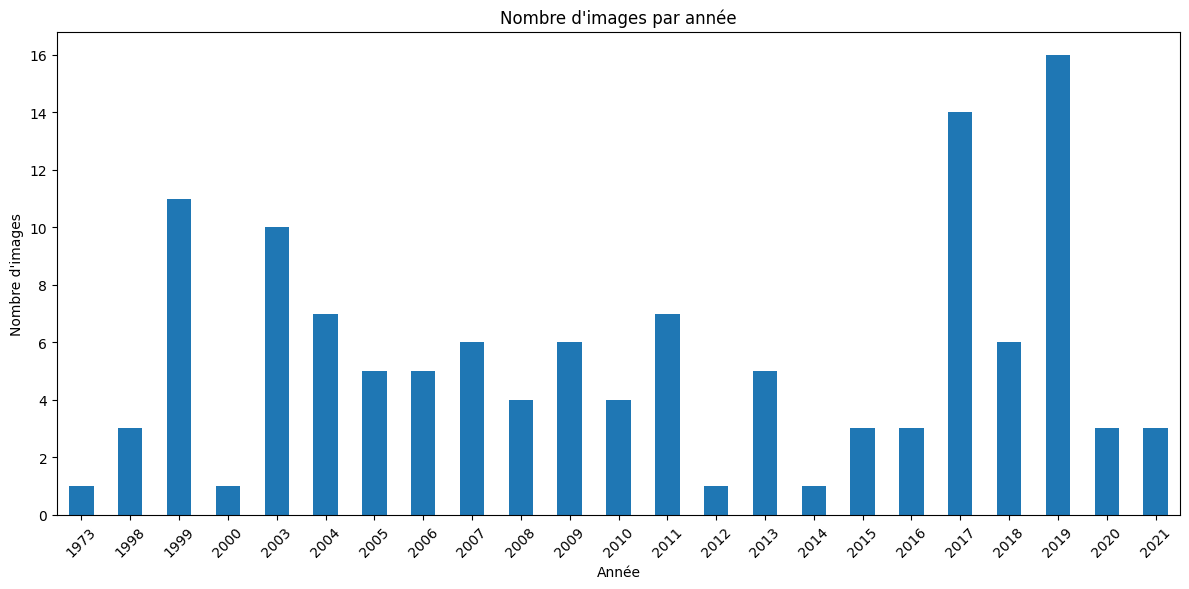


Statistiques de la collection :
Nombre total d'images : 125

Images par année :
year
1973     1
1998     3
1999    11
2000     1
2003    10
2004     7
2005     5
2006     5
2007     6
2008     4
2009     6
2010     4
2011     7
2012     1
2013     5
2014     1
2015     3
2016     3
2017    14
2018     6
2019    16
2020     3
2021     3
Name: count, dtype: int64

Images par catégorie :
category
planet        15
galaxy        15
star          15
nebula        15
asteroid      10
supernova     10
black hole    10
pulsar        10
moon          10
jupiter        5
saturn         5
mars           5
Name: count, dtype: int64


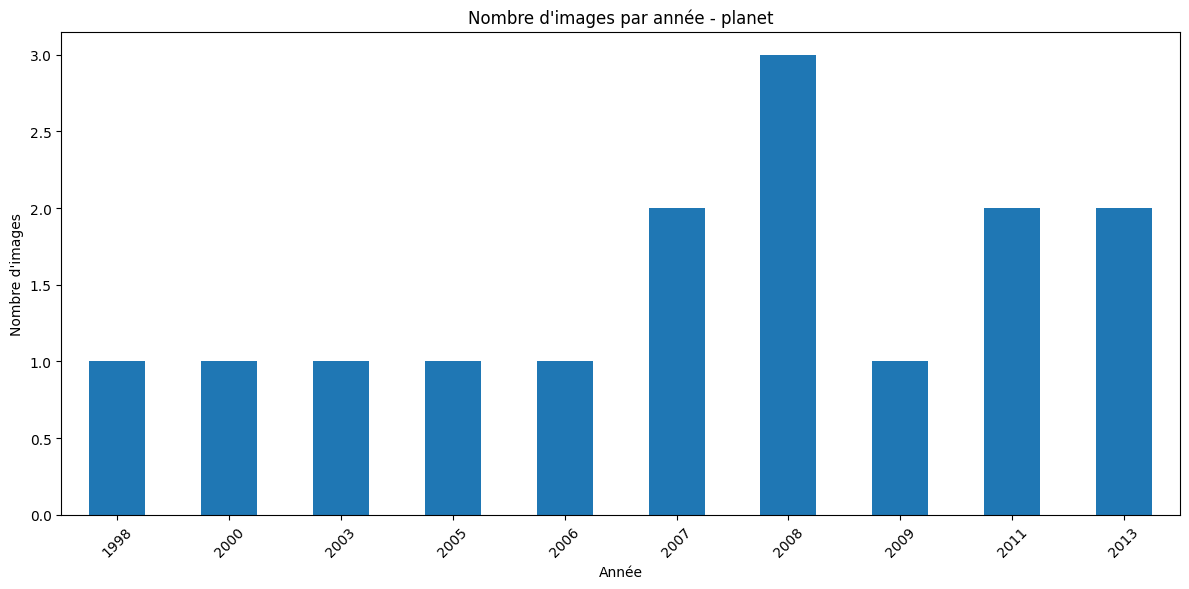

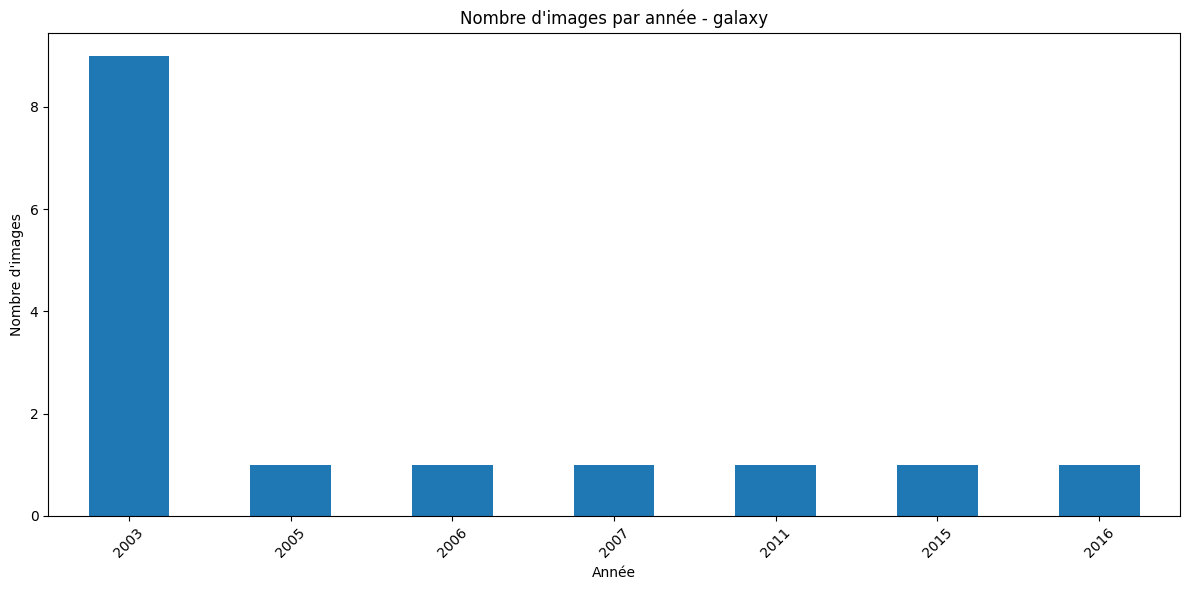

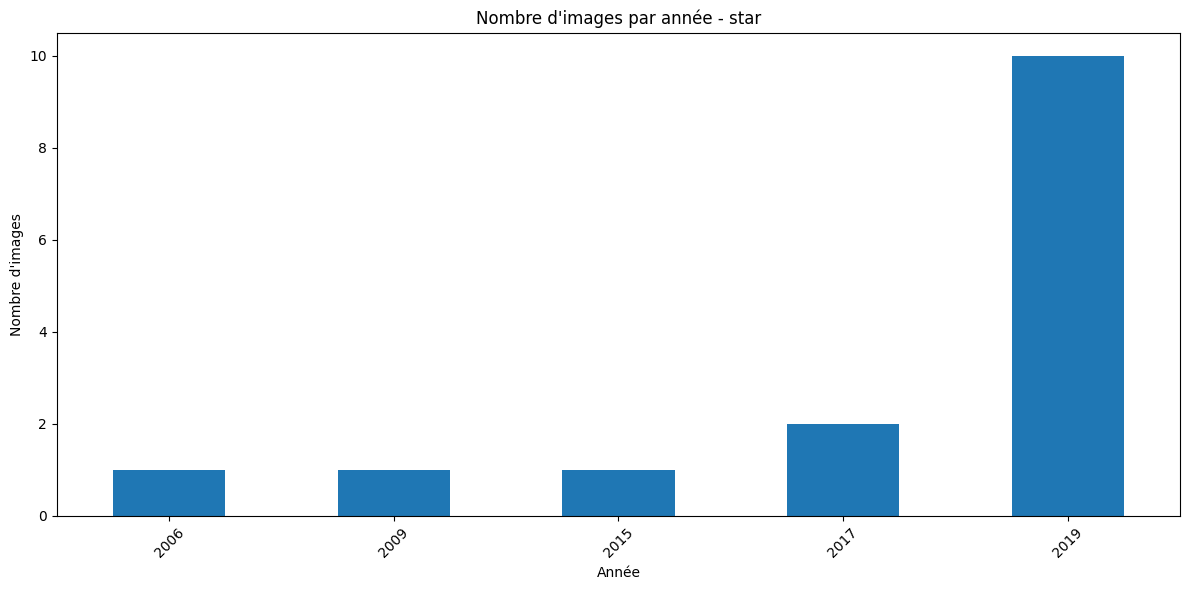

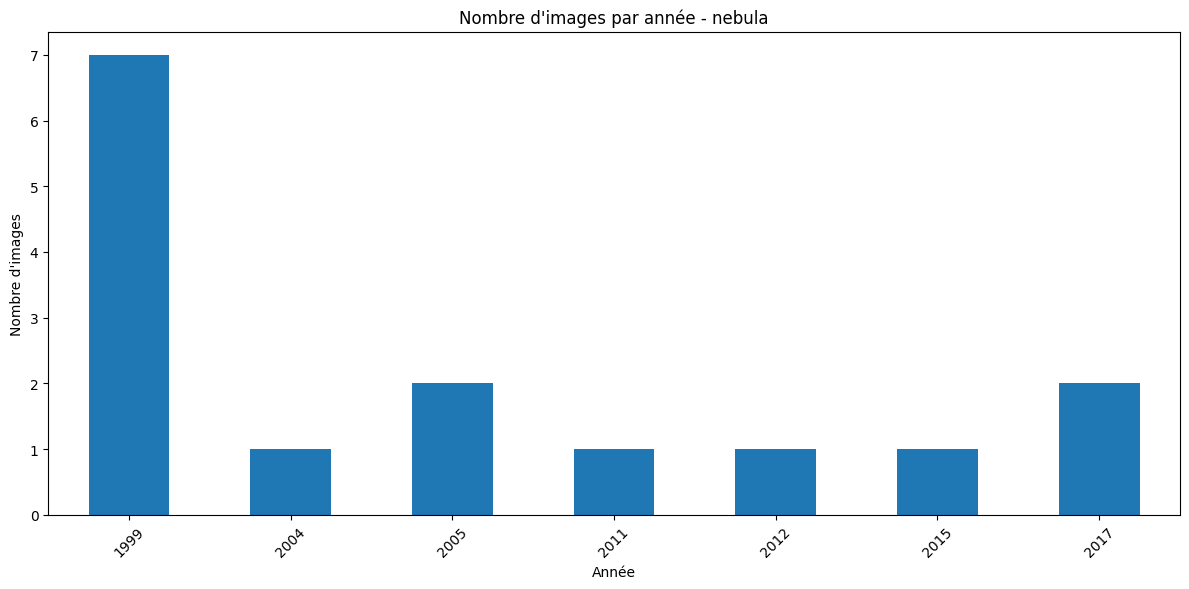

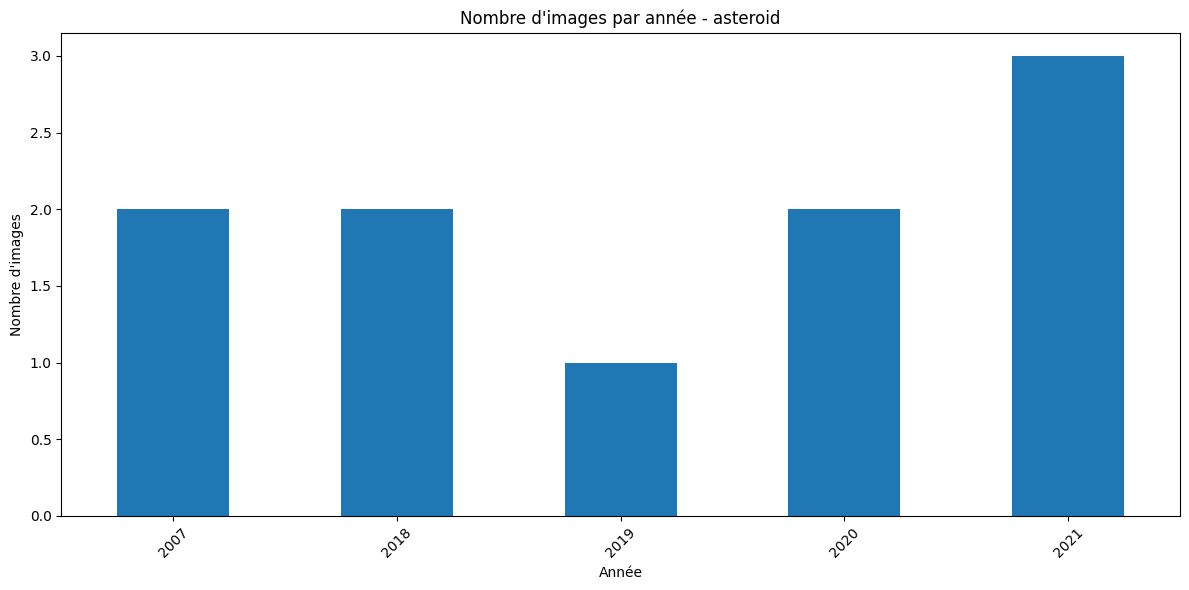

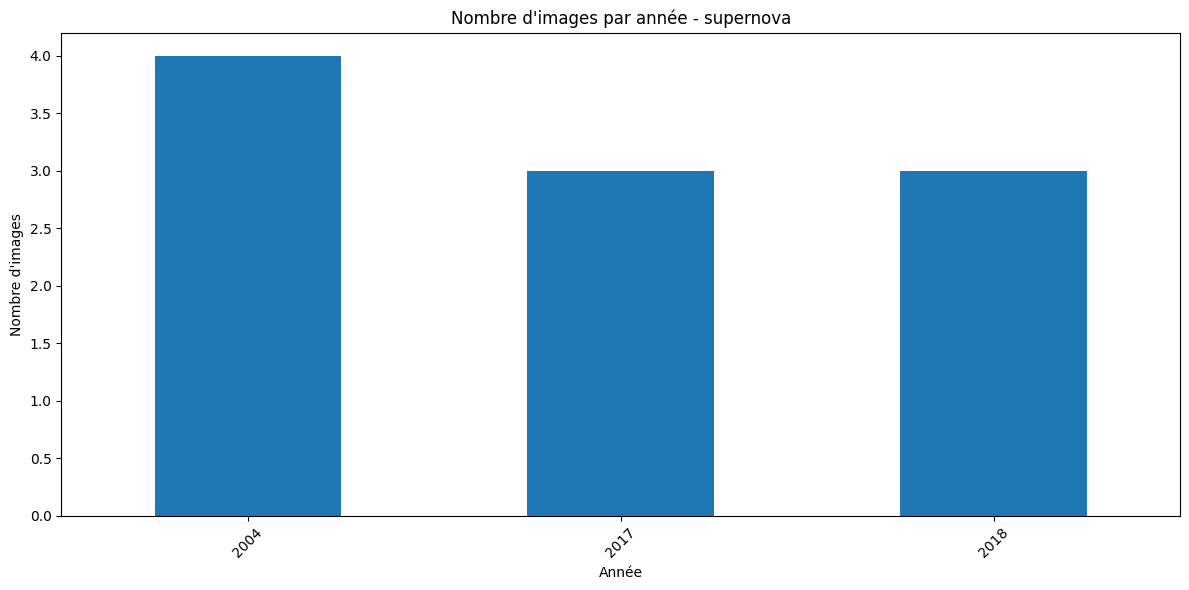

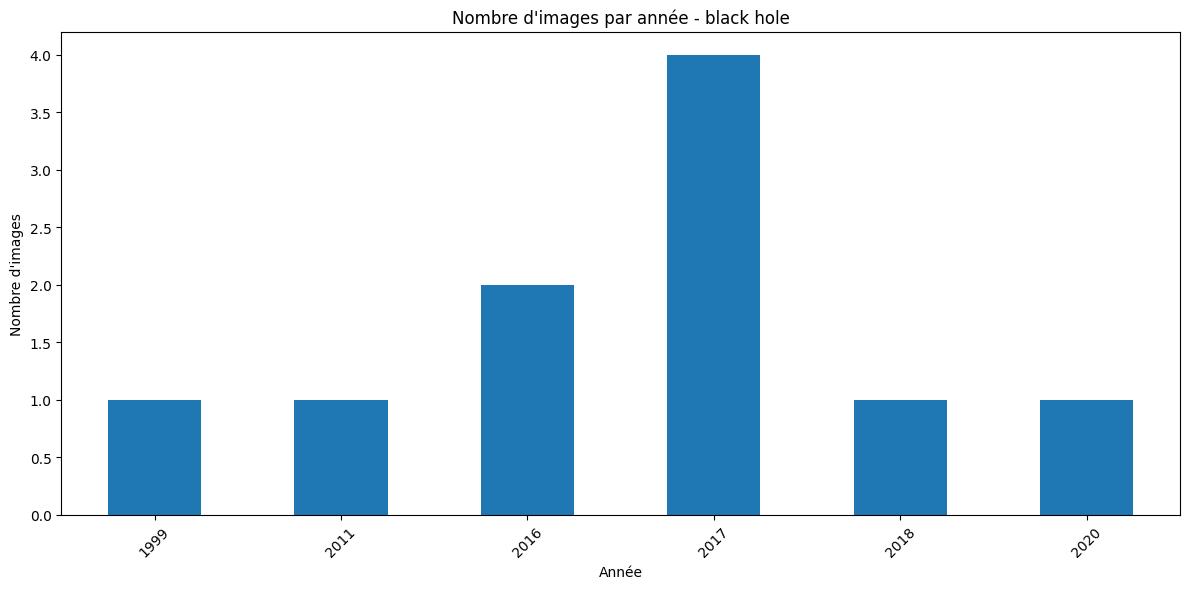

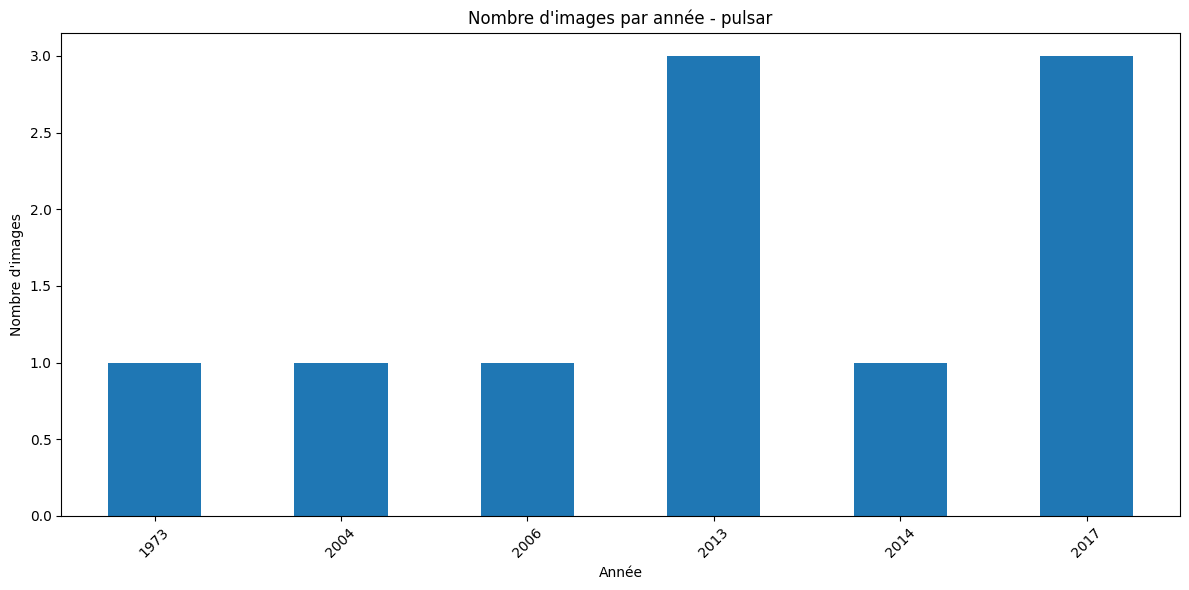

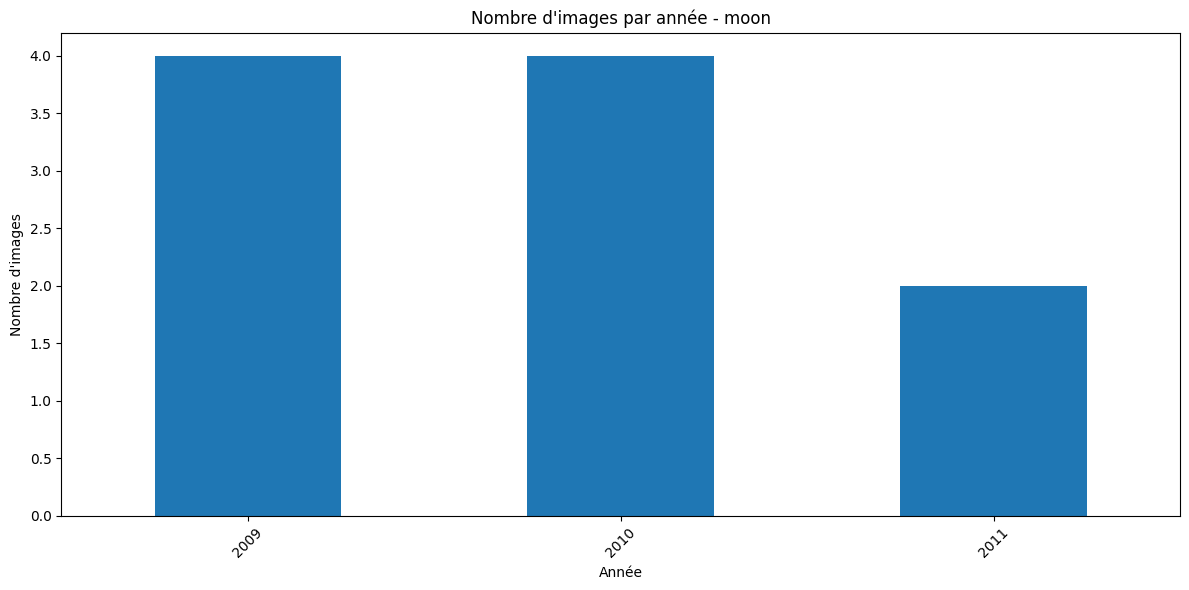

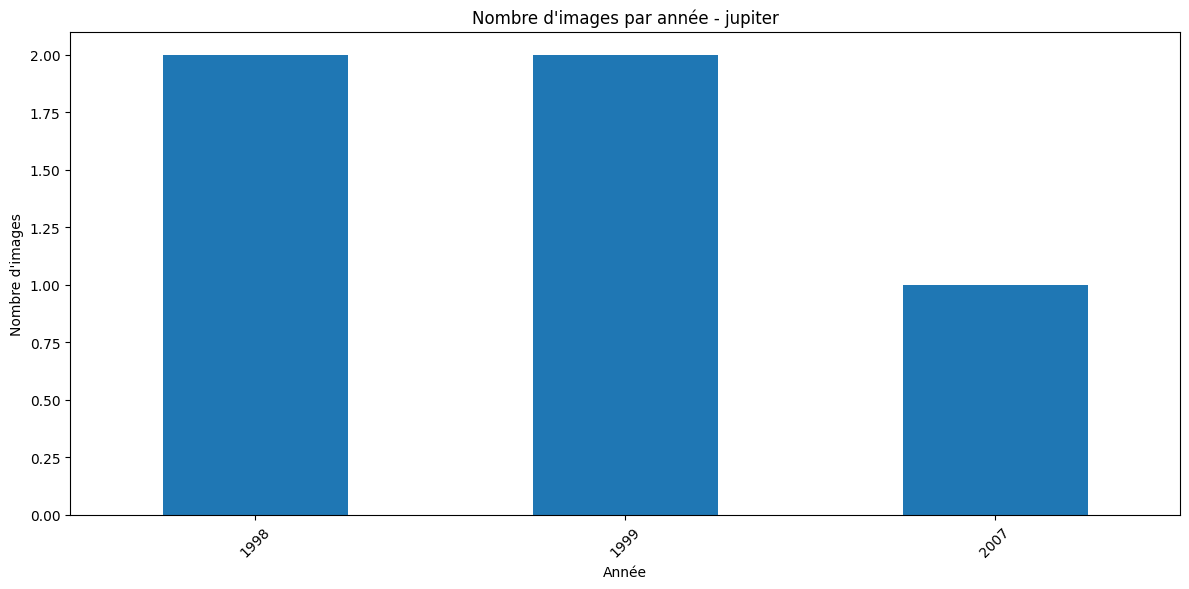

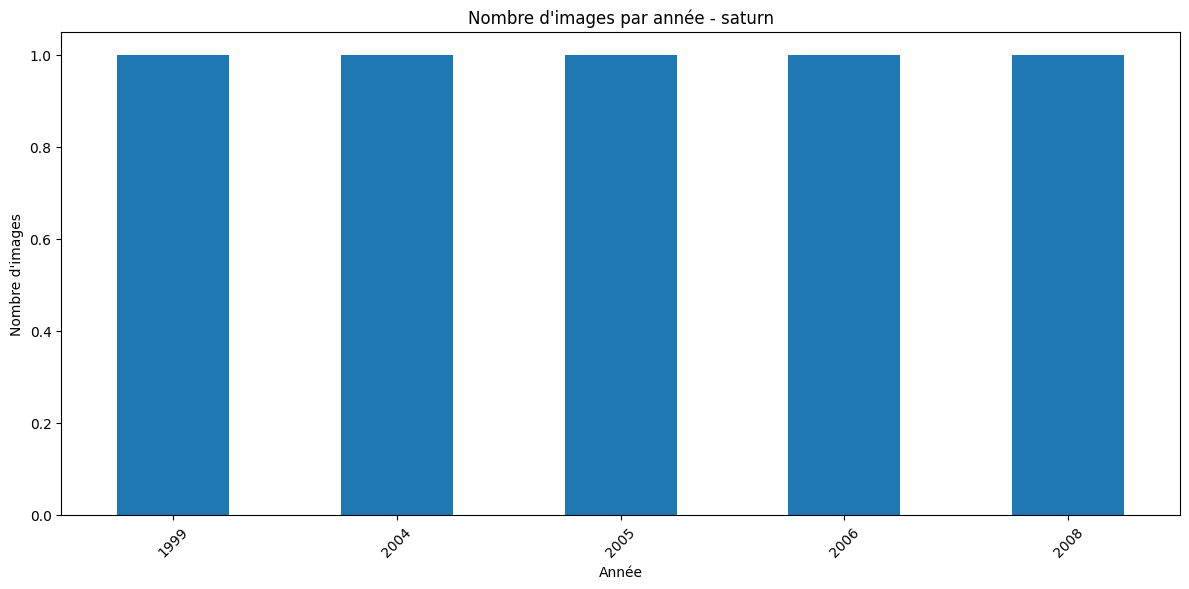

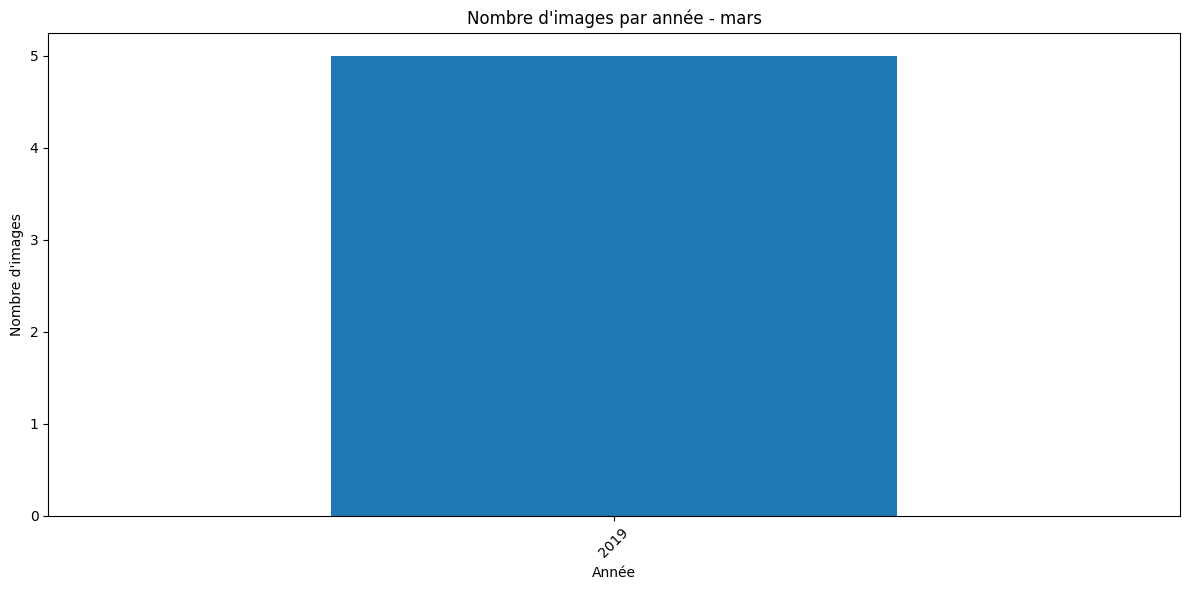

In [9]:
import json
import matplotlib.pyplot as plt
import pandas as pd

def analyze_nasa_images(json_path):
    # Charger les données
    with open(json_path, 'r', encoding='utf-8') as f:
        data = json.load(f)

    # Convertir en un format plat pour l'analyse
    all_images = []

    # Vérifier si les données sont une liste ou un dictionnaire
    if isinstance(data, list):
        all_images = data
    else:
        for category, images in data.items():
            for img in images:
                img['category'] = category
                all_images.append(img)

    # Créer un DataFrame
    df = pd.DataFrame(all_images)

    # Créer une visualisation des images par année
    plt.figure(figsize=(12, 6))
    year_counts = df['year'].value_counts().sort_index()
    year_counts.plot(kind='bar')
    plt.title("Nombre d'images par année")
    plt.xlabel("Année")
    plt.ylabel("Nombre d'images")
    plt.xticks(rotation=45)
    plt.tight_layout()

    # Afficher le graphique dans Jupyter
    plt.show()

    # Afficher les statistiques
    print("\nStatistiques de la collection :")
    print(f"Nombre total d'images : {len(df)}")

    print("\nImages par année :")
    print(year_counts)

    if 'category' in df.columns:
        print("\nImages par catégorie :")
        print(df['category'].value_counts())

        # Tracer les images par année pour chaque catégorie
        for category in df['category'].unique():
            plt.figure(figsize=(12, 6))
            category_df = df[df['category'] == category]
            category_year_counts = category_df['year'].value_counts().sort_index()
            category_year_counts.plot(kind='bar')
            plt.title(f"Nombre d'images par année - {category}")
            plt.xlabel("Année")
            plt.ylabel("Nombre d'images")
            plt.xticks(rotation=45)
            plt.tight_layout()
            plt.show()

    return df

# Utilisation du script
df = analyze_nasa_images('astronomy_dataset/metadata/nasa_images.json')




### 4.2. Le nombre d'images disponibles pour les différents types : taille de l'image, l'orientation des images, les modèles d'appareils photo, type de corps céleste. 

In [6]:
!pip install matplotlib

Generando gráficos para la categoría: asteroid


<Figure size 800x600 with 0 Axes>

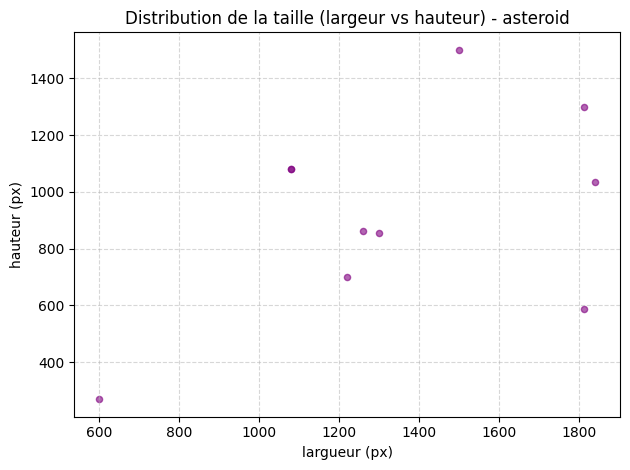

Generando gráficos para la categoría: black hole


<Figure size 800x600 with 0 Axes>

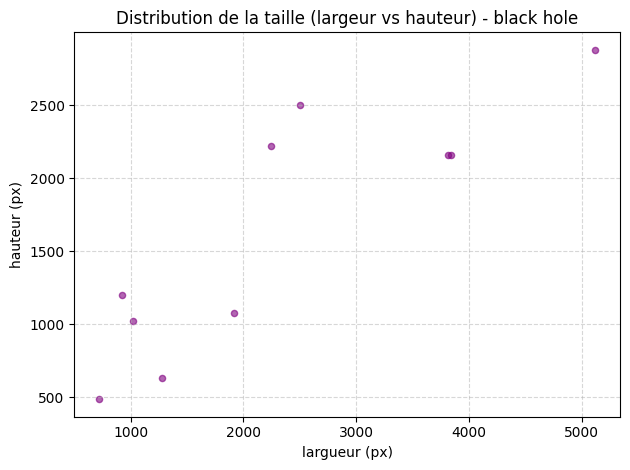

Generando gráficos para la categoría: black_hole


<Figure size 800x600 with 0 Axes>

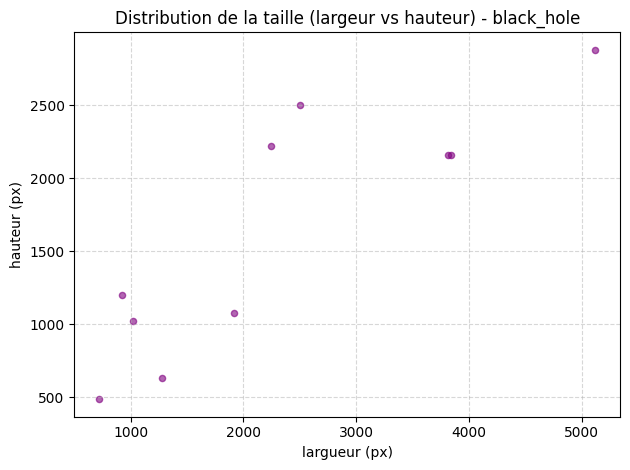

Generando gráficos para la categoría: galaxy


<Figure size 800x600 with 0 Axes>

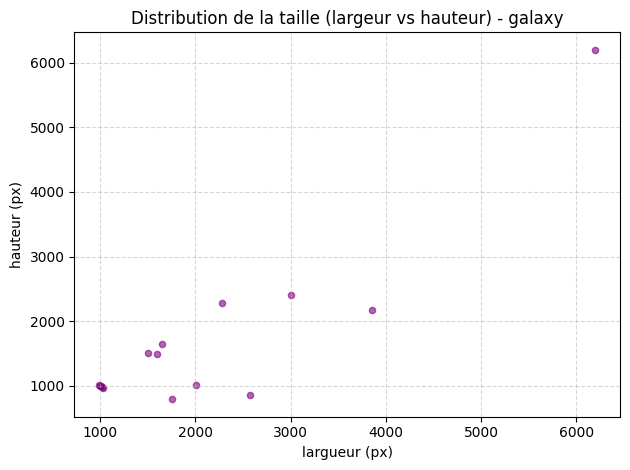

Generando gráficos para la categoría: jupiter


In [ ]:

import json
import matplotlib.pyplot as plt
import pandas as pd

def analyze_nasa_images(json_path):
    # Cargar los datos
    with open(json_path, 'r', encoding='utf-8') as f:
        all_images = json.load(f)

    # Transformar el tamaño a un formato más manejable (por ejemplo: "1920x1080")
    for image in all_images:
        if 'size' in image and 'width' in image['size'] and 'height' in image['size']:
            image['size'] = f"{image['size']['width']}x{image['size']['height']}"

        # Extraer el equipo (Make o Model en EXIF), si está disponible
        exif = image.get('exif', {})
        image['equipment'] = exif.get('Make', exif.get('Model', 'Desconocido'))

    # Crear DataFrame
    df = pd.DataFrame(all_images)

    # Iterar sobre cada categoría para generar gráficos
    for category in df['category'].unique():
        category_df = df[df['category'] == category]

        print(f"Generando gráficos para la categoría: {category}")

        # Gráfico de dispersión del tamaño (ancho vs alto)
        plt.figure(figsize=(8, 6))
        category_df['size'].str.extract(r'(\d+)x(\d+)').astype(int).plot.scatter(x=0, y=1, alpha=0.6, color='purple')
        plt.title(f"Distribution de la taille (largeur vs hauteur) - {category}")
        plt.xlabel("largueur (px)")
        plt.ylabel("hauteur (px)")
        plt.grid(True, linestyle='--', alpha=0.5)
        plt.tight_layout()
        plt.show()


# Uso del script
analyze_nasa_images('astronomy_dataset/metadata/extracted_metadata.json')

Generando gráficos para la categoría: asteroid


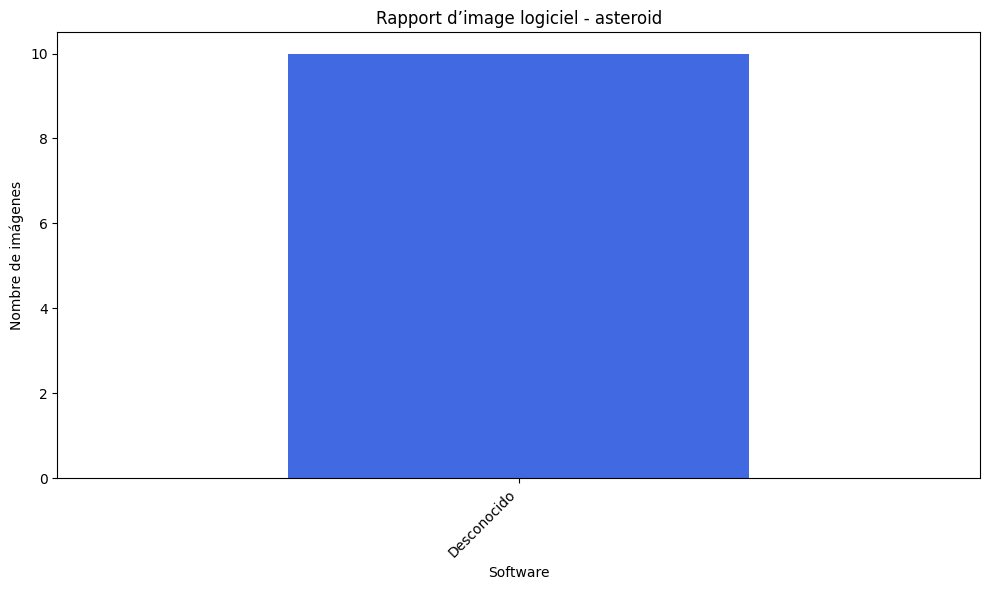

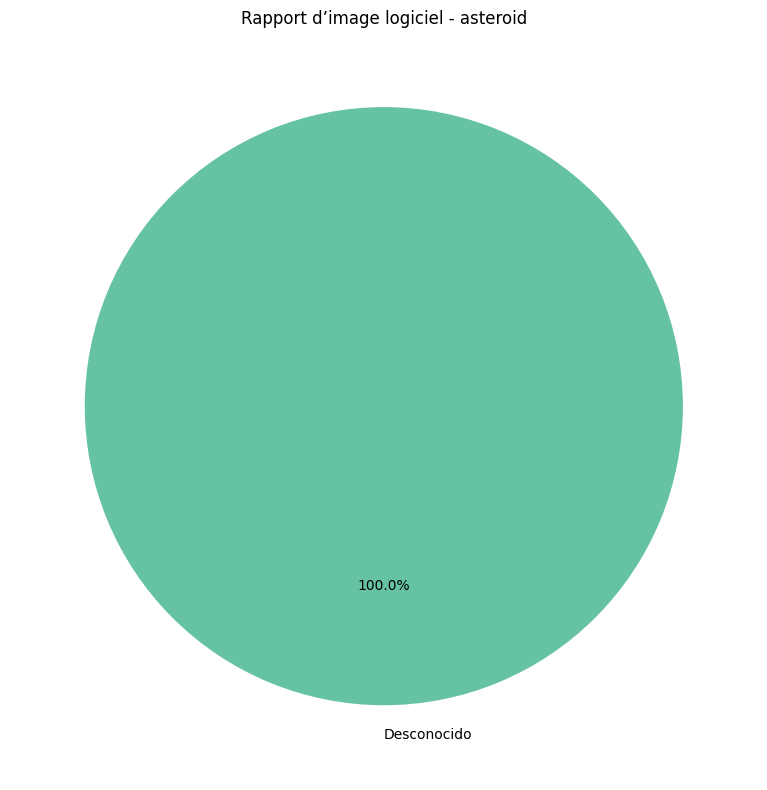

Generando gráficos para la categoría: black hole


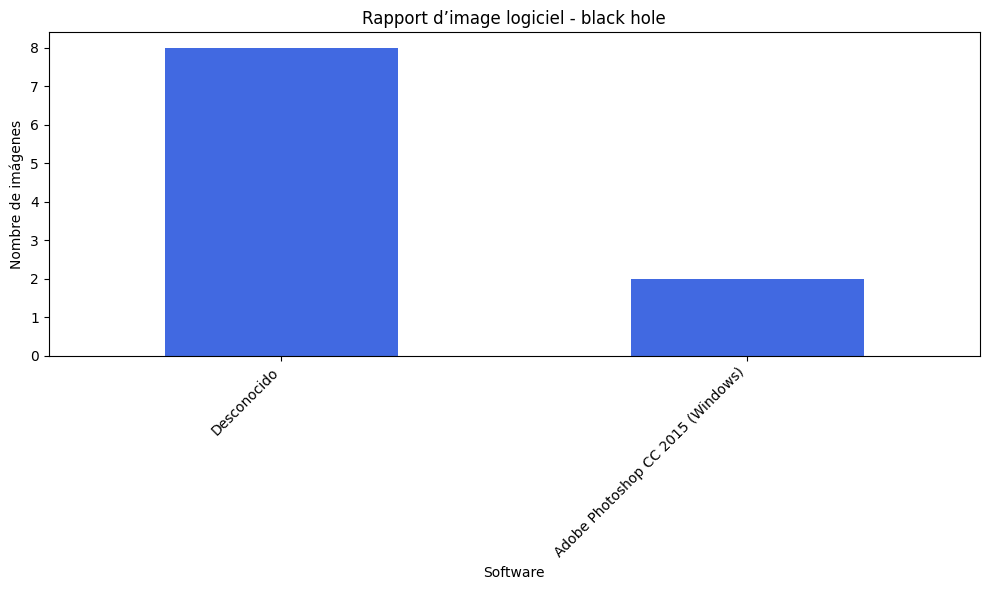

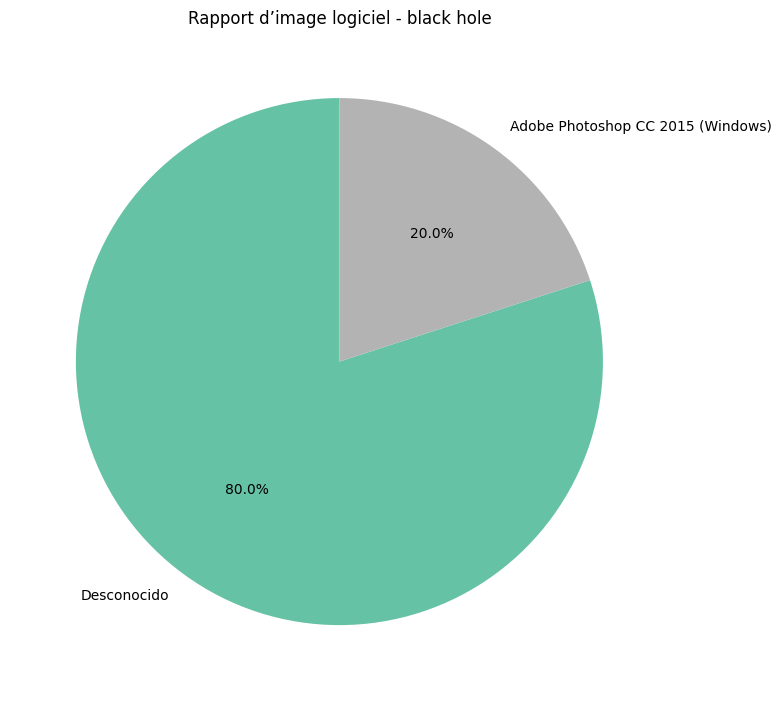

Generando gráficos para la categoría: black_hole


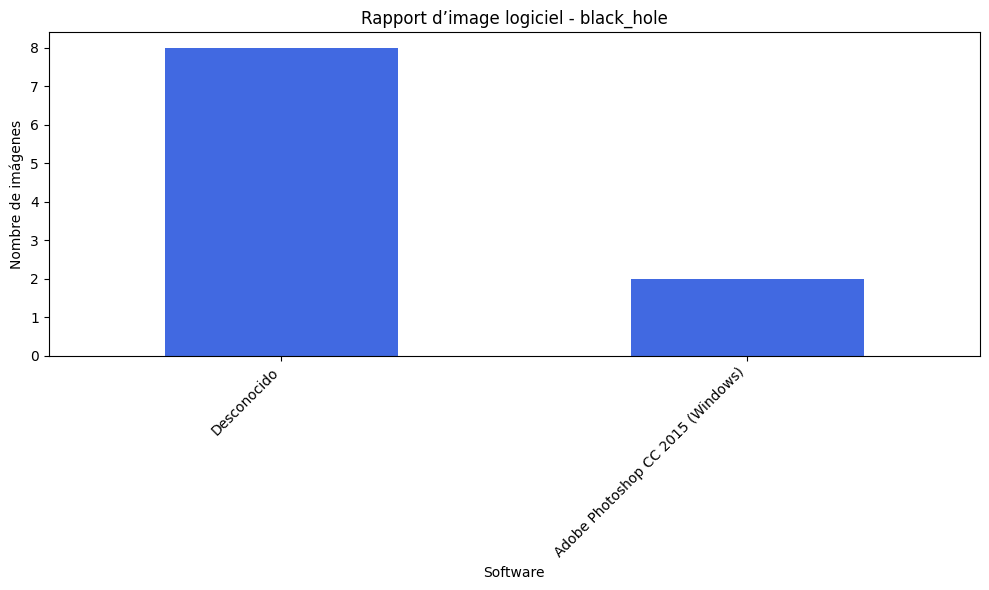

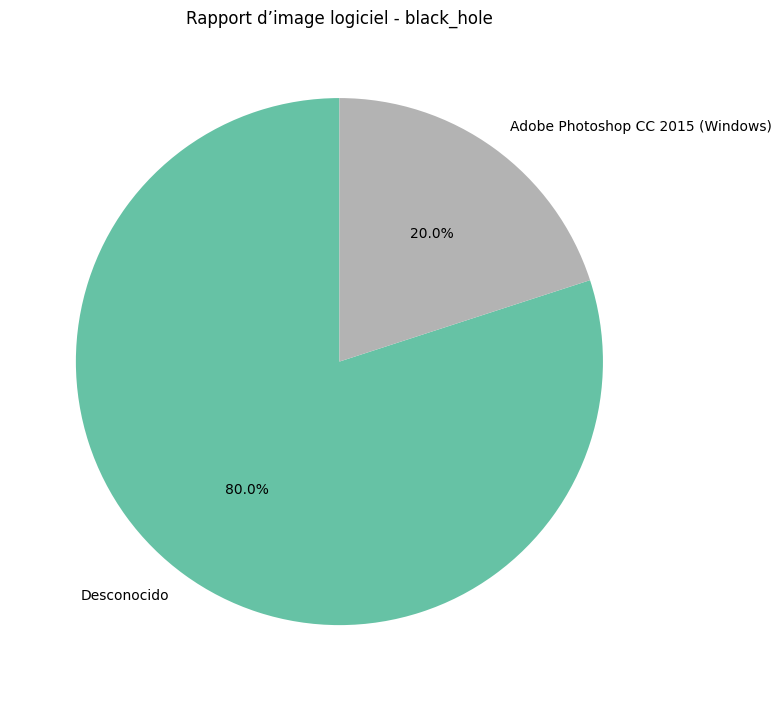

Generando gráficos para la categoría: galaxy


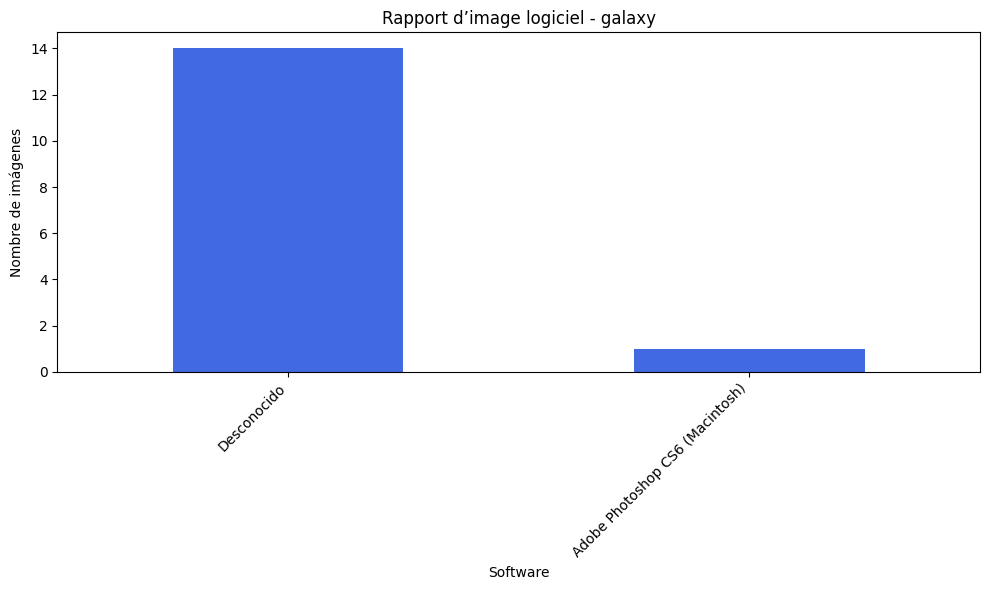

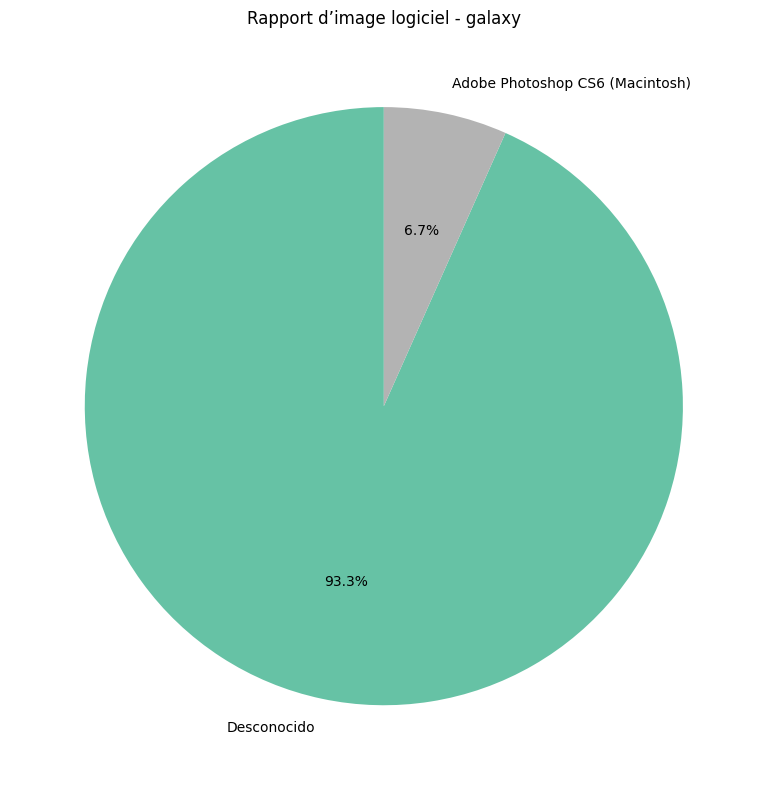

Generando gráficos para la categoría: jupiter


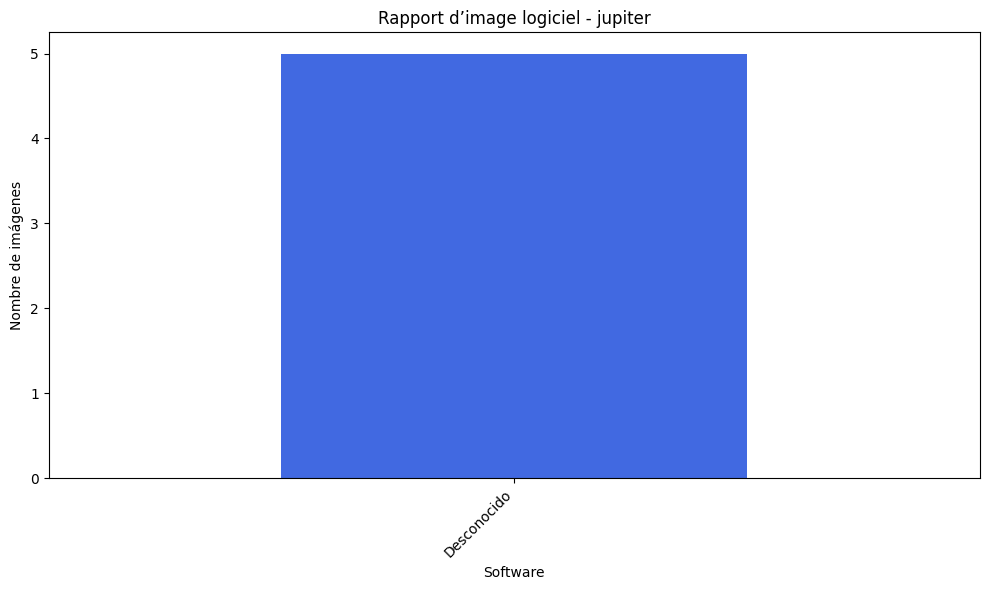

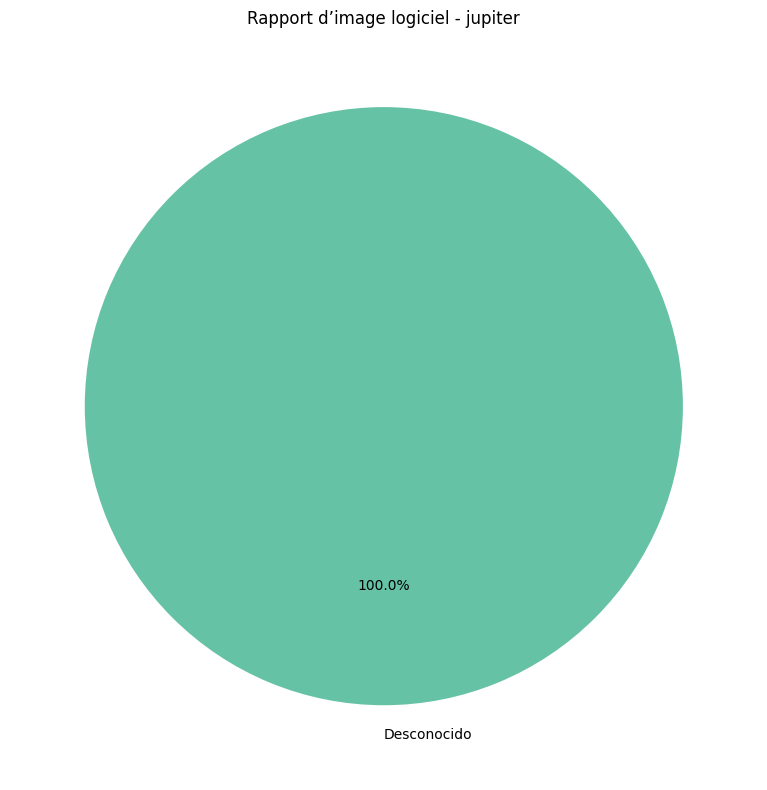

Generando gráficos para la categoría: moon


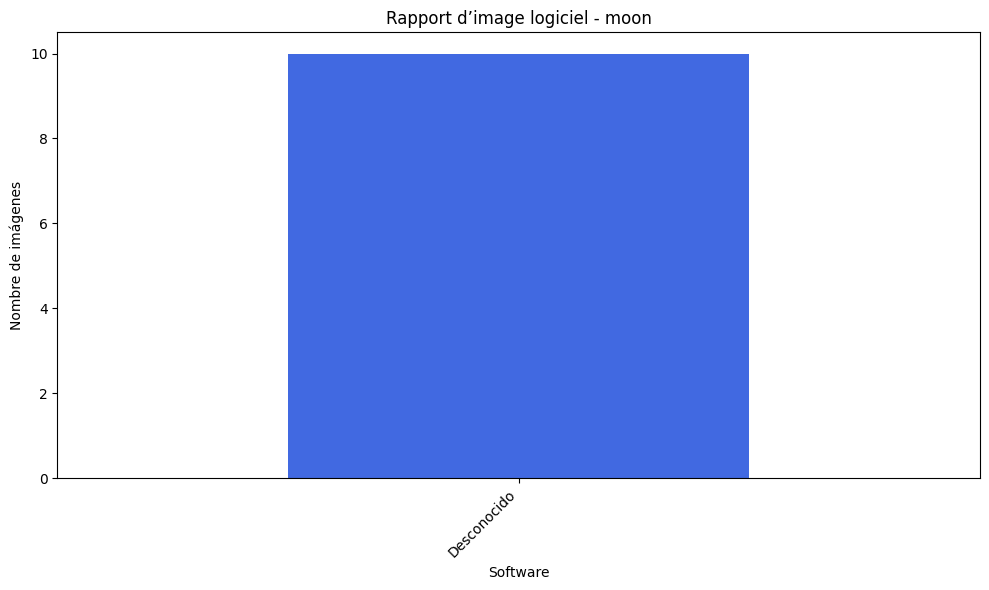

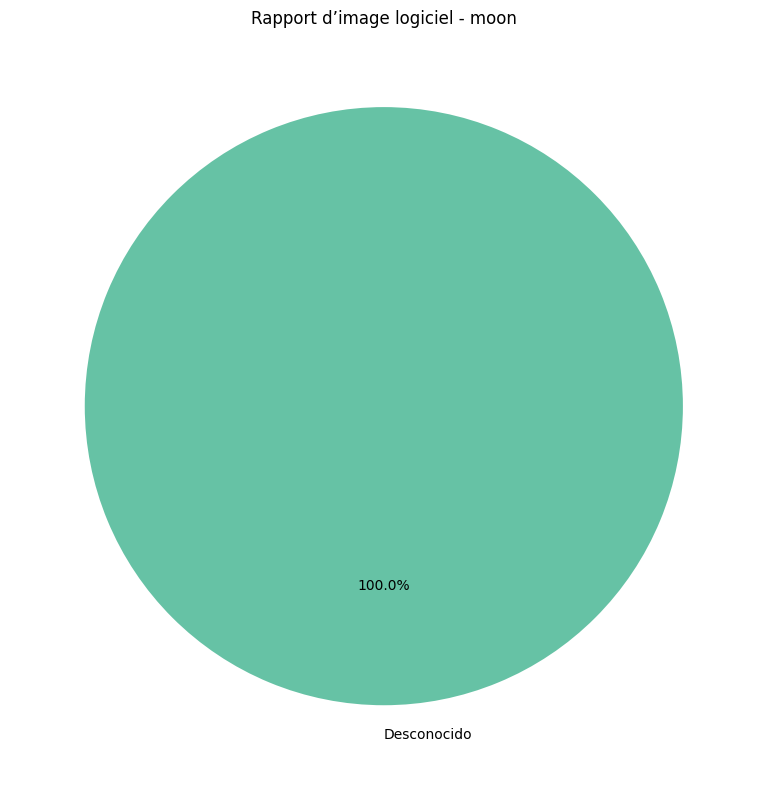

Generando gráficos para la categoría: nebula


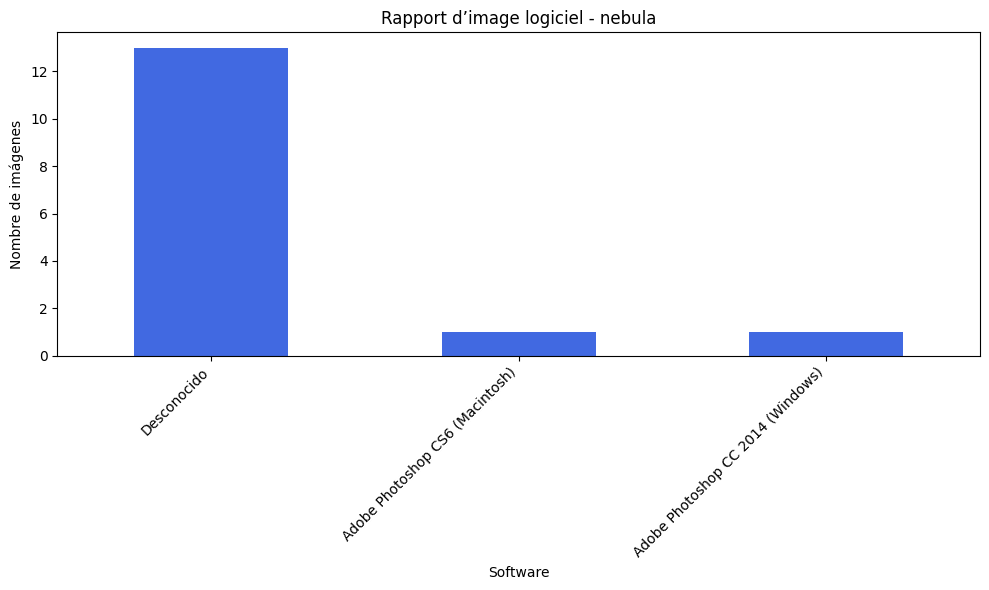

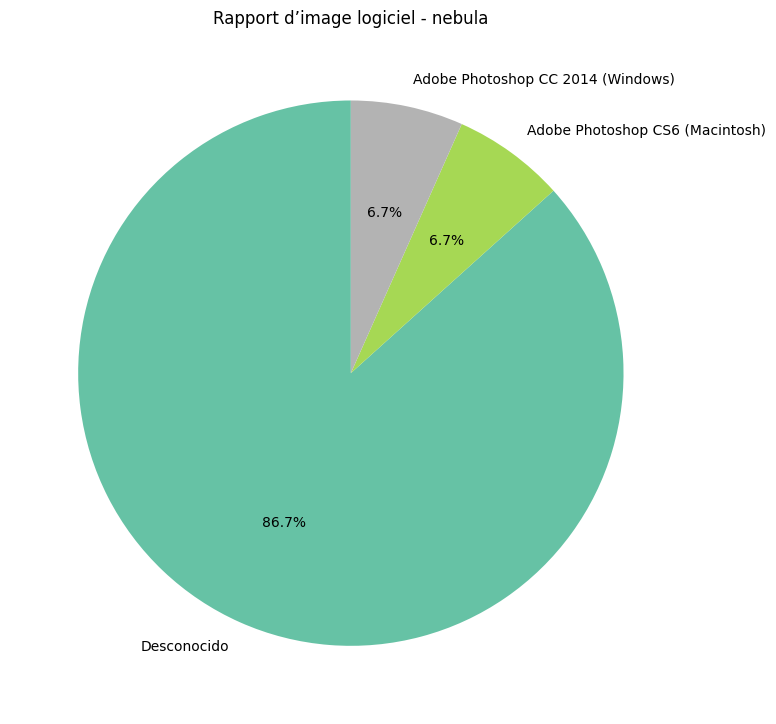

Generando gráficos para la categoría: planet


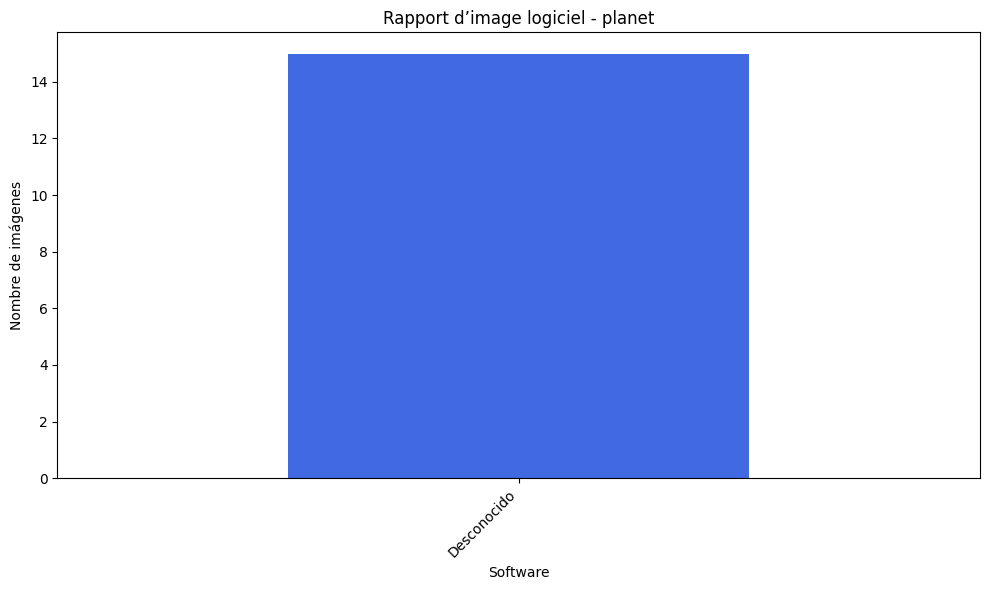

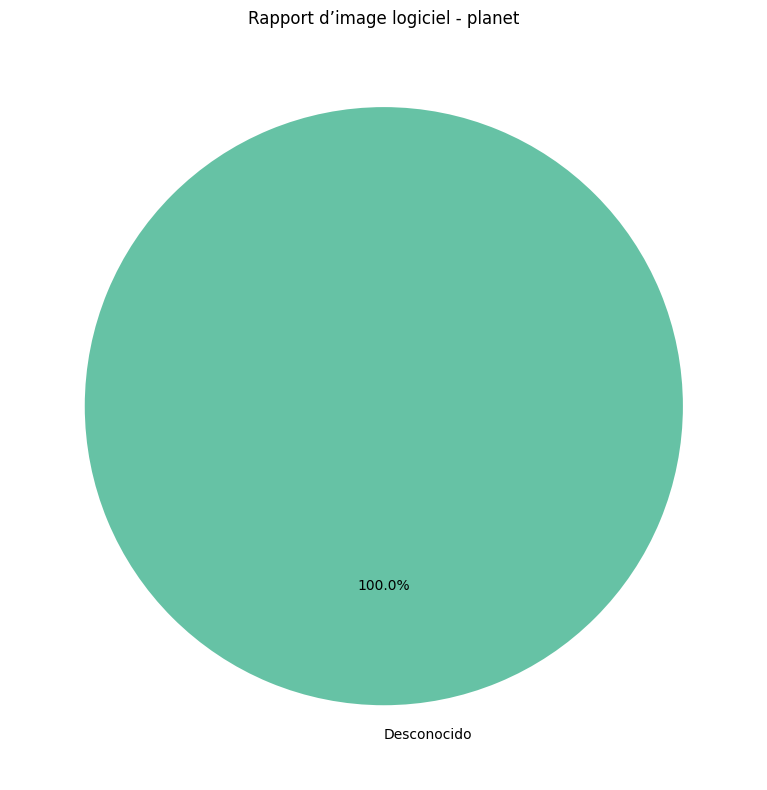

Generando gráficos para la categoría: pulsar


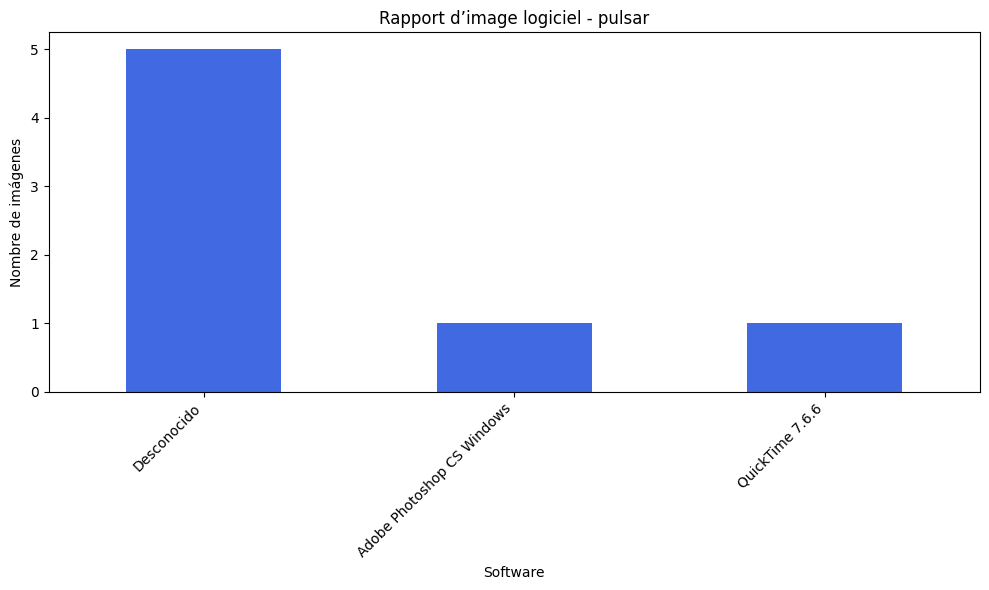

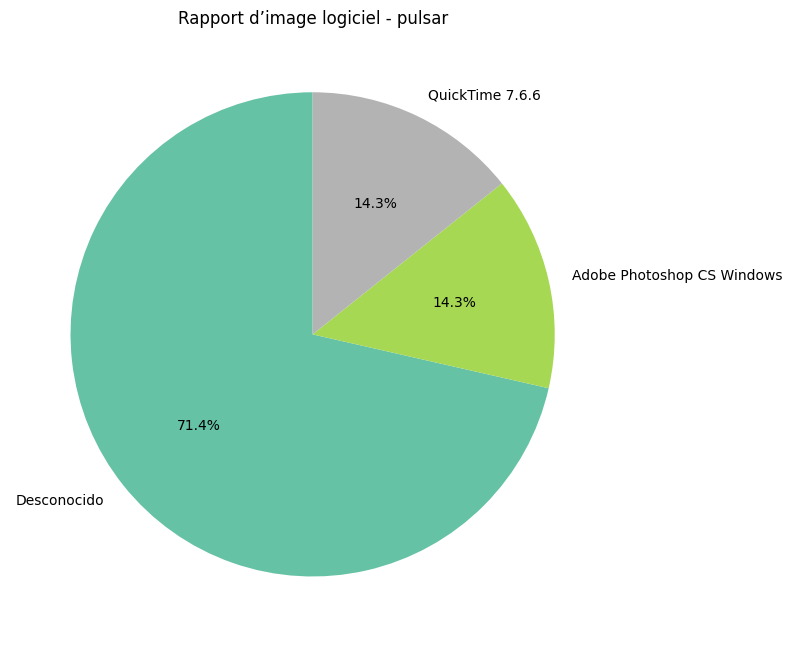

Generando gráficos para la categoría: saturn


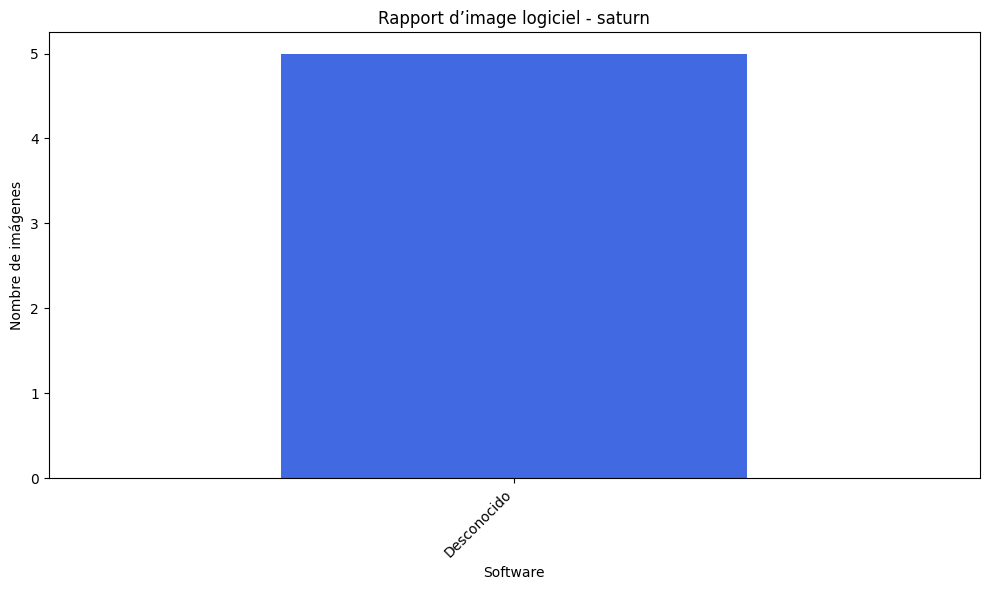

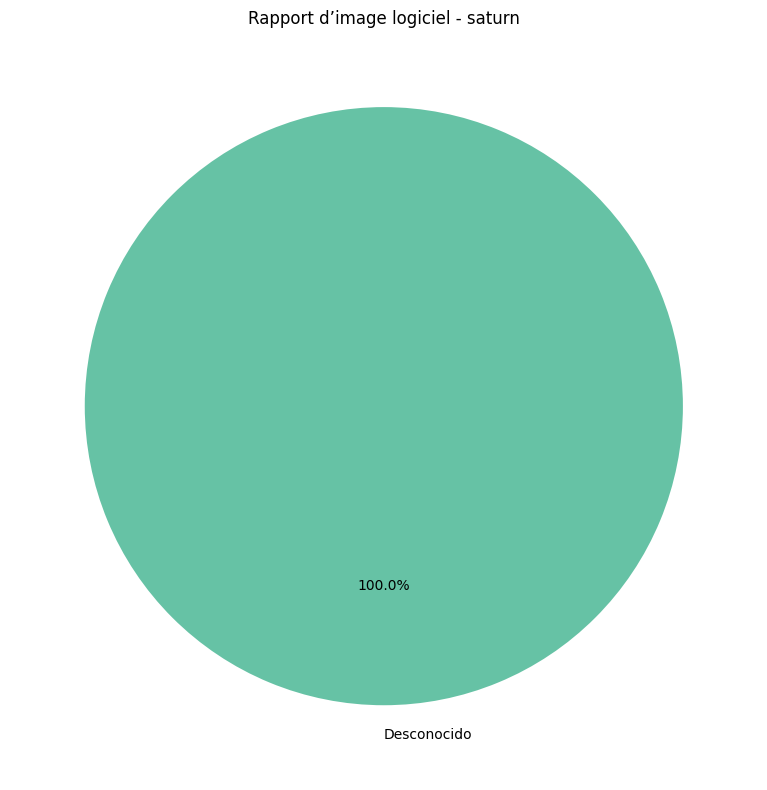

Generando gráficos para la categoría: star


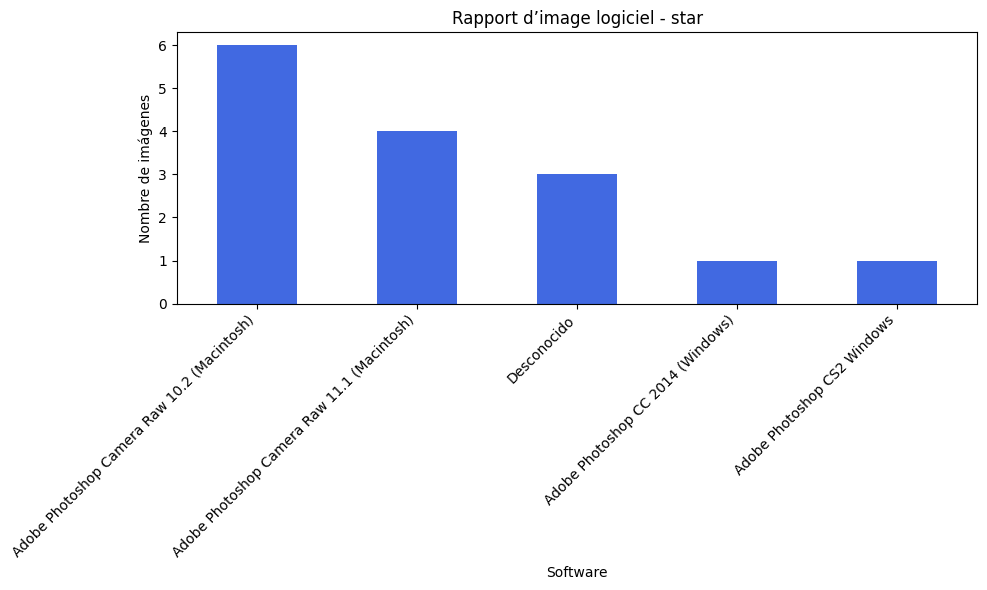

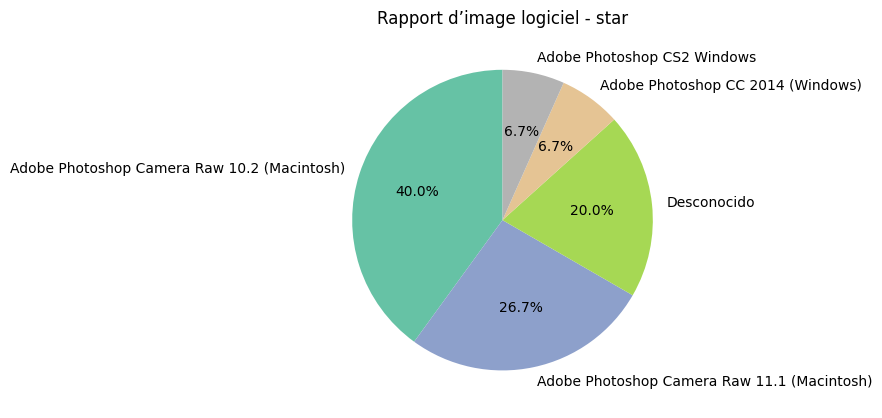

Generando gráficos para la categoría: supernova


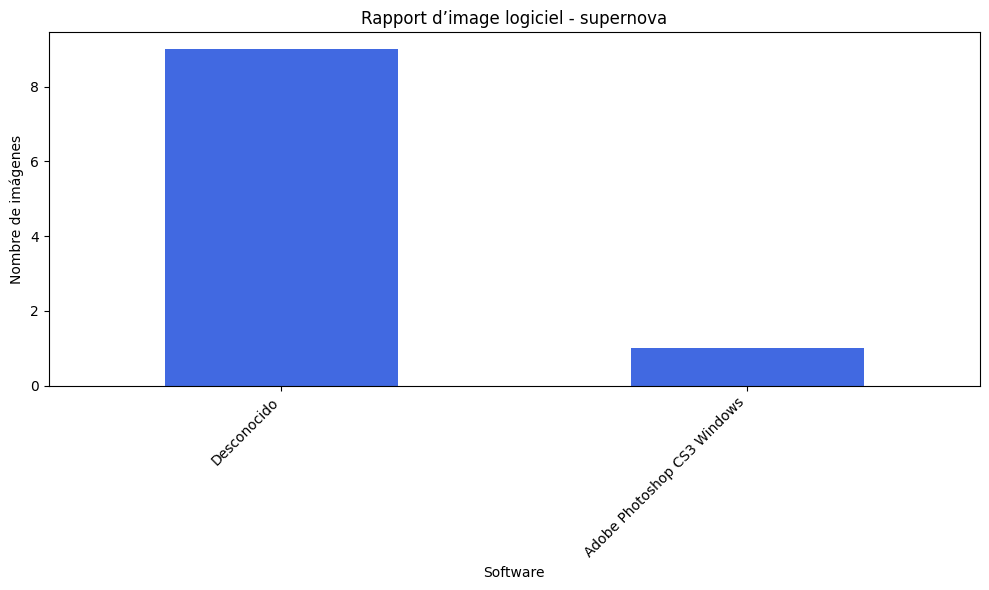

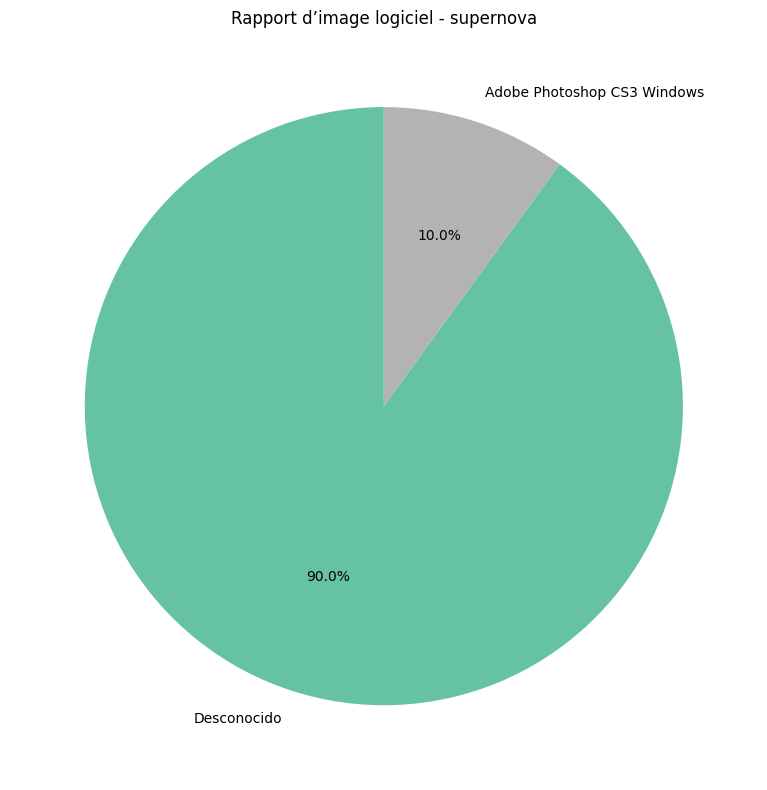

In [59]:
import json
import matplotlib.pyplot as plt
import pandas as pd

def plot_by_software_per_category(json_path):
    # Cargar los datos
    with open(json_path, 'r', encoding='utf-8') as f:
        all_images = json.load(f)

    # Crear un DataFrame de pandas
    df = pd.DataFrame(all_images)

    # Extraer el campo "Software" dentro de la columna "exif"
    df['software'] = df['exif'].apply(lambda x: x.get('Software', 'Desconocido'))

    # Iterar por cada categoría
    for category in df['category'].unique():
        category_df = df[df['category'] == category]

        print(f"Generando gráficos para la categoría: {category}")

        # Contar la frecuencia de cada software en la categoría actual
        software_counts = category_df['software'].value_counts()

        if software_counts.empty:
            print(f"No hay datos de software para la categoría {category}")
            continue

        # Gráfico de barras
        plt.figure(figsize=(10, 6))
        software_counts.plot(kind='bar', color='royalblue')
        plt.title(f"Rapport d’image logiciel - {category}")
        plt.xlabel("Software")
        plt.ylabel("Nombre de imágenes")
        plt.xticks(rotation=45, ha='right')
        plt.tight_layout()
        plt.show()

        # Gráfico de pastel
        plt.figure(figsize=(8, 8))
        software_counts.plot(kind='pie', autopct='%1.1f%%', startangle=90, cmap='Set2')
        plt.title(f"Rapport d’image logiciel - {category}")
        plt.ylabel("")
        plt.tight_layout()
        plt.show()

# Ruta del JSON
plot_by_software_per_category('astronomy_dataset/metadata/extracted_metadata.json')

### 4.3. Caractéristiques des couleurs

In [ ]:
!pip install scikit-learn pillow numpy matplotlib
!pip install opencv-python


[notice] A new release of pip is available: 25.0 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


Génération des palettes de couleurs par catégorie...


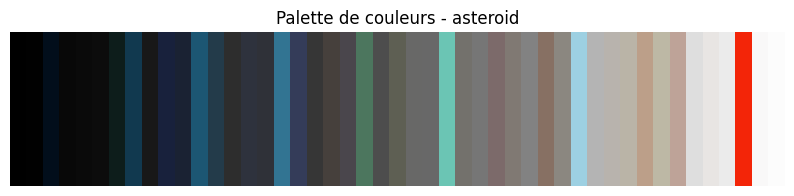

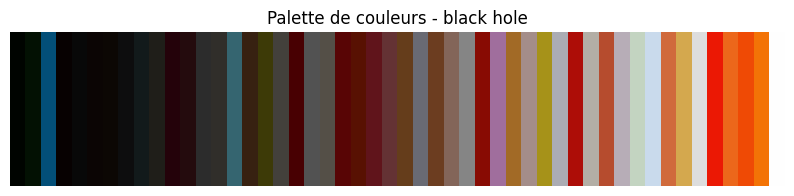

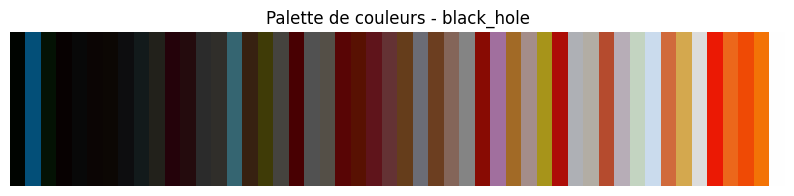

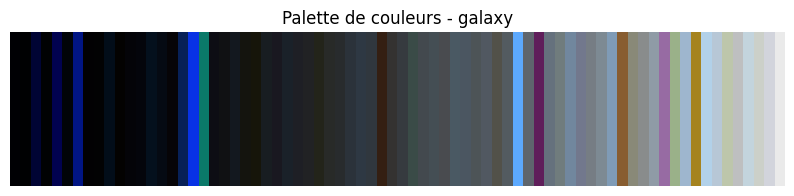

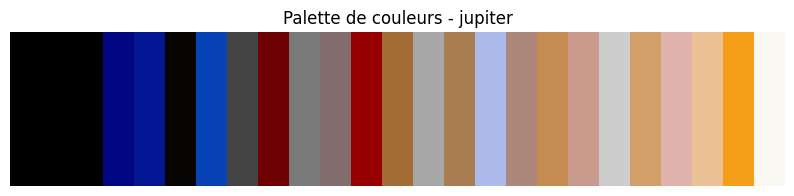

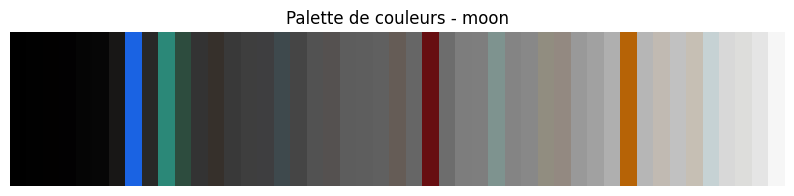

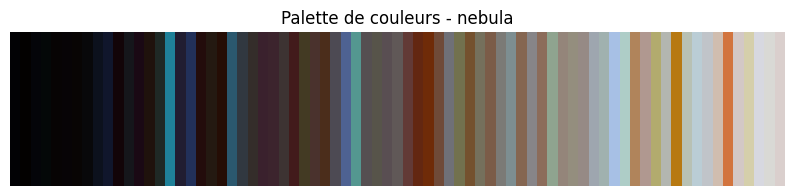

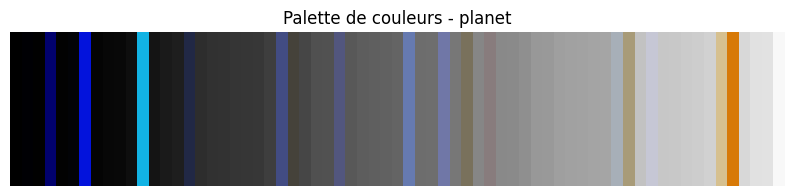

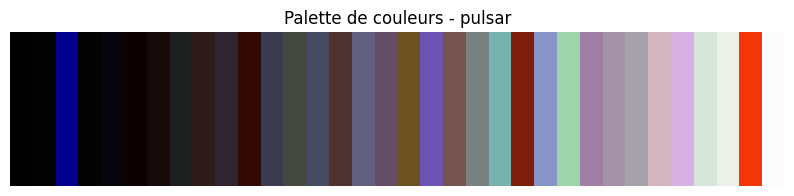

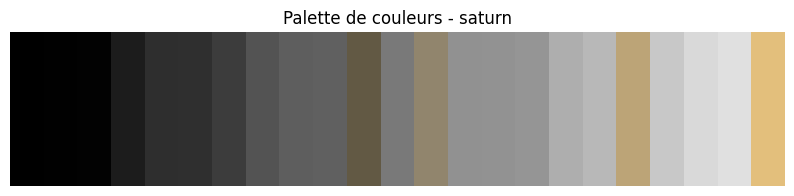

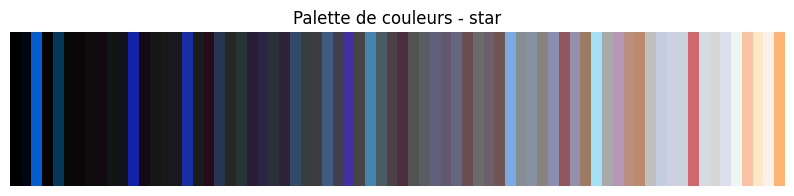

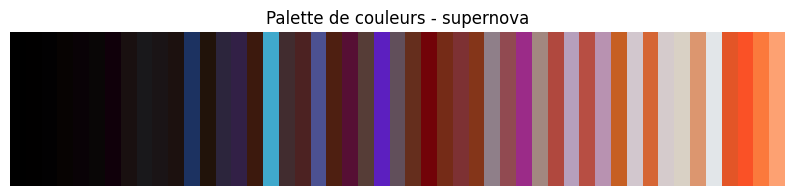

Génération des histogrammes de couleurs RGB par catégorie...


MemoryError: 

In [61]:
import os
import json
import numpy as np
import matplotlib.pyplot as plt
import cv2
from sklearn.cluster import KMeans

def extract_colors(image_path, n_clusters=5):
    """Extrait les couleurs dominantes d'une image en utilisant K-Means."""
    image = cv2.imread(image_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    pixels = image.reshape((-1, 3))

    kmeans = KMeans(n_clusters=n_clusters, n_init=10)
    kmeans.fit(pixels)

    colors = kmeans.cluster_centers_.astype(int)
    counts = np.bincount(kmeans.labels_)

    return colors, counts

def plot_category_colors(image_data, n_clusters=5):
    """Affiche la palette de couleurs dominante pour chaque catégorie d'images."""
    category_colors = {}

    for image_info in image_data:
        category = image_info['category']
        image_path = image_info['file_path']

        if category not in category_colors:
            category_colors[category] = []

        colors, _ = extract_colors(image_path, n_clusters)
        category_colors[category].extend(colors)

    # Affichage des couleurs par catégorie
    for category, colors in category_colors.items():
        unique_colors, counts = np.unique(np.array(colors), axis=0, return_counts=True)

        plt.figure(figsize=(10, 2))
        plt.title(f"Palette de couleurs - {category}")
        plt.imshow([unique_colors], aspect='auto')
        plt.axis('off')
        plt.show()

def plot_rgb_histograms(image_data):
    """Génère des histogrammes des couleurs RGB pour chaque catégorie."""
    for category in set(img['category'] for img in image_data):
        category_images = [img['file_path'] for img in image_data if img['category'] == category]

        red_vals, green_vals, blue_vals = [], [], []

        for img_path in category_images:
            image = cv2.imread(img_path)
            image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

            red_vals.extend(image[:, :, 0].flatten())
            green_vals.extend(image[:, :, 1].flatten())
            blue_vals.extend(image[:, :, 2].flatten())

        plt.figure(figsize=(10, 4))
        plt.title(f"Distribution des couleurs RGB - {category}")
        plt.hist(red_vals, bins=50, color='red', alpha=0.6, label='Rouge')
        plt.hist(green_vals, bins=50, color='green', alpha=0.6, label='Vert')
        plt.hist(blue_vals, bins=50, color='blue', alpha=0.6, label='Bleu')

        plt.xlabel("Intensité de couleur")
        plt.ylabel("Fréquence")
        plt.legend()
        plt.show()

if __name__ == "__main__":
    metadata_path = 'astronomy_dataset/metadata/extracted_metadata.json'

    # Charger les métadonnées des images
    with open(metadata_path, 'r', encoding='utf-8') as f:
        image_data = json.load(f)

    print("Génération des palettes de couleurs par catégorie...")
    plot_category_colors(image_data)

    print("Génération des histogrammes de couleurs RGB par catégorie...")
    plot_rgb_histograms(image_data)


## 5. Système de recommandation

Dans cette tâche, l'objectif est de construire le système de recommandation des images à un utilisateur. 

### Questions:

1. Quelle approche avez-vous décidé de prendre ? Filtrage collaboratif, basé sur le contenu ou une approche hybride ? 

    - L’approche utilisée est basée sur le contenu. Cette approche se concentre sur les caractéristiques de l’image (telles que les couleurs, la luminosité, la taille, etc.) et les préférences explicites de l’utilisateur (raisons de ses choix) pour faire des recommandations. Le système tente de trouver des similitudes entre les images préférées de l’utilisateur et les images disponibles dans la galerie, à l’aide de fonctionnalités visuelles et en les regroupant à l’aide du clustering (KMeans) pour générer des recommandations.

2. Quel(s) algorithme(s) avez-vous choisi (classification, clustering, ...) ? 

    - L’algorithme de clustering a été principalement choisi, en particulier l’algorithme KMeans.
    En outre, des techniques de prétraitement des données telles que la normalisation (avec StandardScaler) sont également utilisées pour s’assurer que les entités sont à une échelle comparable avant le clustering.
    Bien qu’il ne s’agisse pas d’un algorithme de classification (où des étiquettes ou des catégories prédéfinies sont attribuées), l’utilisation de KMeans dans ce cas permet d’organiser les images en groupes similaires en fonction de leurs caractéristiques, ce qui est au cœur de l’approche de clustering.

3. Pour chaque utilisateur, êtes-vous maintenant en mesure de construire une profil ? 

    - Oui, le système est capable de créer un profil pour chaque utilisateur, en utilisant à la fois les photos que l’utilisateur a marquées comme favorites et les raisons qu’il donne pour son choix. Ce profil est ensuite utilisé pour faire des recommandations d’images en fonction des caractéristiques communes que l’utilisateur préfère.

4. Quel type d'information avez-vous utilisé pour établir un profil d'utilisateur profil ? Qu'est-ce qui manque ? Quelles sont les limites de votre proposition ?

    - Pour créer un profil d’utilisateur, le système utilise principalement les préférences explicites de l’utilisateur, c’est-à-dire les images qu’il a marquées comme favorites et les raisons de ces choix. De plus, il analyse les caractéristiques visuelles des images, telles que les couleurs dominantes, la luminosité moyenne, la taille et le rapport hauteur/largeur. La catégorie des images est également prise en compte, mais elle n’affecte pas directement le profil. Cependant, le système présente quelques faiblesses. Il ne contient pas de préférences implicites, telles que le temps que l’utilisateur passe à regarder une image ou le fait qu’il clique dessus sans la marquer comme favorite. Cela permettrait d’obtenir une vue plus complète de l’utilisateur. Il serait également utile d’avoir plus d’informations sur les interactions passées, telles que les images que l’utilisateur a vues mais n’a pas signalées, ou la façon dont il a réagi aux recommandations précédentes. 
    - Un autre aspect qui manque est le contexte des choix de l’utilisateur. Par exemple, le système ne tient pas compte du fait que la préférence d’une image dépend de facteurs tels que l’heure de la journée ou l’humeur de l’utilisateur, ce qui pourrait personnaliser les recommandations plus précisément. Le système a des limites, telles que le recours à des préférences explicites, ce qui peut être un problème pour les utilisateurs qui ne fournissent pas beaucoup de commentaires directs. De plus, l’utilisation de KMeans pour regrouper des images n’est peut-être pas la plus efficace à mesure que le catalogue s’agrandit, et les fonctionnalités visuelles utilisées sont assez simples. L’amélioration de ces fonctionnalités et l’exploration d’approches plus avancées pourraient rendre les recommandations plus précises et plus évolutives.

In [58]:
import os
import json
import numpy as np
import pandas as pd
from PIL import Image
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from collections import Counter
import shutil
import re

# Dossiers de base
IMAGE_FOLDER = "astronomy_dataset/images/"
USER_FOLDER = "usuarios/"
RECOMMENDATION_FOLDER = "recomendacion/"

# Créer un dossier pour les recommandations si il n'existe pas
os.makedirs(RECOMMENDATION_FOLDER, exist_ok=True)

def extract_image_features(image_path):
    """Extrait les caractéristiques visuelles de l'image : couleurs dominantes, taille, orientation."""
    try:
        img = Image.open(image_path).convert("RGB")
        width, height = img.size
        
        # Réduire la taille pour une analyse rapide
        img_resized = img.resize((100, 100))
        
        # Extraire les couleurs dominantes
        pixels = np.array(img_resized).reshape(-1, 3)
        kmeans = KMeans(n_clusters=3, random_state=42, n_init=10).fit(pixels)
        dominant_colors = kmeans.cluster_centers_.flatten()
        
        # Calculer la luminosité moyenne
        brightness = np.mean(pixels, axis=0).mean()
        
        # Calculer le rapport d'aspect
        aspect_ratio = width / height
        
        # Taille de l'image en mégapixels
        size_mp = (width * height) / 1000000
        
        return {
            'dominant_colors': dominant_colors,
            'brightness': brightness,
            'width': width,
            'height': height,
            'aspect_ratio': aspect_ratio,
            'size_mp': size_mp,
            'path': image_path
        }
    except Exception as e:
        print(f"Erreur lors du traitement de l'image {image_path}: {e}")
        return None

def extract_metadata_from_path(image_path):
    """Extrait les métadonnées du chemin de l'image (catégorie)."""
    # Extraire la catégorie du chemin
    match = re.search(r'images/([^/\\]+)', image_path)
    category = match.group(1) if match else "inconnu"
    
    return {
        'category': category,
        'path': image_path
    }

def parse_user_preferences(user):
    """Analyse les préférences de l'utilisateur à partir de son fichier JSON."""
    user_file = os.path.join(USER_FOLDER, f"{user}.json")
    if not os.path.exists(user_file):
        print(f"Le fichier de l'utilisateur {user} n'existe pas.")
        return []
    
    try:
        with open(user_file, 'r', encoding='utf-8') as f:
            data = json.load(f)
        
        liked_images = data.get("likes", [])
        
        # Structure des préférences
        preferences = []
        for item in liked_images:
            path = item.get("path")
            reason = item.get("reason")
            
            if path and reason:
                # Normaliser les raisons
                normalized_reason = reason.lower().strip()
                preferences.append({
                    'path': path,
                    'reason': normalized_reason
                })
        
        return preferences
    except Exception as e:
        print(f"Erreur lors de la lecture du fichier utilisateur {user}: {e}")
        return []

def process_all_images():
    """Traite toutes les images et extrait les caractéristiques et métadonnées."""
    all_images = []
    
    # Parcourir toutes les catégories
    for category in os.listdir(IMAGE_FOLDER):
        category_path = os.path.join(IMAGE_FOLDER, category)
        if os.path.isdir(category_path):
            for image_file in os.listdir(category_path):
                if image_file.lower().endswith((".jpg", ".jpeg", ".png")):
                    image_path = os.path.join(category_path, image_file)
                    # Extraire les caractéristiques visuelles
                    features = extract_image_features(image_path)
                    if features:
                        # Extraire les métadonnées
                        metadata = extract_metadata_from_path(image_path)
                        # Combiner les deux
                        image_data = {**features, **metadata}
                        all_images.append(image_data)
    
    return all_images

def create_feature_matrix(images_data):
    """Crée une matrice de caractéristiques pour le clustering."""
    # Extraire les caractéristiques visuelles
    visual_features = []
    paths = []
    categories = []
    
    for img in images_data:
        # Caractéristiques visuelles
        features = [
            *img['dominant_colors'],  # Déballer les couleurs dominantes
            img['brightness'],
            img['aspect_ratio'],
            img['size_mp']
        ]
        visual_features.append(features)
        paths.append(img['path'])
        categories.append(img['category'])
    
    # Convertir en tableau numpy
    X = np.array(visual_features)
    
    # Normaliser les caractéristiques
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)
    
    return X_scaled, paths, categories

def cluster_user_preferences(user_preferences, all_images_data):
    """Analyse les modèles dans les préférences de l'utilisateur en utilisant KMeans."""
    if not user_preferences:
        return None, {}
    
    # Compter les raisons des préférences
    reason_counter = Counter([pref['reason'] for pref in user_preferences])
    
    # Vérifier s'il y a suffisamment d'exemples pour l'entraînement
    min_samples = 2  # Minimum d'échantillons par groupe pour faire du clustering
    
    preference_patterns = {}
    for reason, count in reason_counter.items():
        if count >= min_samples:
            # Filtrer les images par raison
            reason_images = [pref['path'] for pref in user_preferences if pref['reason'] == reason]
            
            # Trouver les images correspondantes dans les données
            reason_features = []
            for path in reason_images:
                # Chercher l'image dans all_images_data
                for img_data in all_images_data:
                    if img_data['path'] == path:
                        # Extraire les caractéristiques pour le clustering
                        features = [
                            *img_data['dominant_colors'],
                            img_data['brightness'],
                            img_data['aspect_ratio'],
                            img_data['size_mp']
                        ]
                        reason_features.append(features)
                        break
            
            if len(reason_features) >= min_samples:
                # Normaliser les caractéristiques
                scaler = StandardScaler()
                features_scaled = scaler.fit_transform(np.array(reason_features))
                
                # Appliquer KMeans
                n_clusters = min(len(reason_features) // 2, 3)  # Maximum de 3 clusters
                if n_clusters < 1:
                    n_clusters = 1
                
                kmeans = KMeans(n_clusters=n_clusters, random_state=42, n_init=10)
                kmeans.fit(features_scaled)
                
                # Sauvegarder le modèle et le scaler
                preference_patterns[reason] = {
                    'model': kmeans,
                    'scaler': scaler,
                    'count': count
                }
    
    return preference_patterns

def recommend_images(user, all_images_data, max_recommendations=10):
    """Génère des recommandations basées sur les modèles de préférence de l'utilisateur."""
    # Obtenir les préférences de l'utilisateur
    user_preferences = parse_user_preferences(user)
    
    if not user_preferences:
        print(f"Aucune préférence trouvée pour l'utilisateur {user}.")
        return []
    
    # Obtenir les chemins des images que l'utilisateur aime
    liked_paths = [pref['path'] for pref in user_preferences]
    
    # Obtenir les modèles de préférence
    preference_patterns = cluster_user_preferences(user_preferences, all_images_data)
    
    # Si aucun modèle n'est trouvé, utiliser une méthode de base
    if not preference_patterns:
        print("Aucun modèle de préférence clair trouvé, utilisation de la méthode de base...")
        return basic_recommendation(user_preferences, all_images_data, liked_paths, max_recommendations)
    
    # Ensemble pour les recommandations
    recommendations = []
    reason_recommendations = {}
    
    # Créer la matrice de caractéristiques pour toutes les images
    X_all, all_paths, all_categories = create_feature_matrix(all_images_data)
    
    # Pour chaque raison de préférence
    for reason, pattern_data in preference_patterns.items():
        model = pattern_data['model']
        scaler = pattern_data['scaler']
        count = pattern_data['count']
        
        # Normaliser les caractéristiques
        X_scaled = scaler.transform(X_all)
        
        # Prédire les clusters pour toutes les images
        clusters = model.predict(X_scaled)
        
        # Trouver les images de préférence pour cette raison
        reason_liked_paths = [pref['path'] for pref in user_preferences if pref['reason'] == reason]
        
        # Trouver les indices des images que l'utilisateur aime
        liked_indices = [i for i, path in enumerate(all_paths) if path in liked_paths]
        
        if liked_indices:
            liked_clusters = [clusters[i] for i in liked_indices]
            target_cluster = Counter(liked_clusters).most_common(1)[0][0]
            
            # Recommander des images du même cluster que l'utilisateur n'a pas vues
            reason_recs = [
                all_paths[i] for i, cluster in enumerate(clusters) 
                if cluster == target_cluster and all_paths[i] not in liked_paths
            ]
            
            # Sauvegarder les recommandations par raison
            reason_recommendations[reason] = reason_recs[:max_recommendations]
            recommendations.extend(reason_recs)
    
    # Prioriser les recommandations selon la fréquence des raisons
    prioritized_recommendations = []
    for reason, recs in sorted(reason_recommendations.items(), 
                              key=lambda x: -preference_patterns[x[0]]['count']):
        prioritized_recommendations.extend(recs)
    
    # Supprimer les doublons en maintenant l'ordre
    final_recommendations = []
    for rec in prioritized_recommendations:
        if rec not in final_recommendations and rec not in liked_paths:
            final_recommendations.append(rec)
    
    # Limiter le nombre de recommandations
    final_recommendations = final_recommendations[:max_recommendations]
    
    # Sauvegarder les recommandations dans un fichier
    for i, path in enumerate(final_recommendations):
        shutil.copy(path, os.path.join(RECOMMENDATION_FOLDER, f"recomendacion_{i+1}.jpg"))
    
    return final_recommendations

def basic_recommendation(user_preferences, all_images_data, liked_paths, max_recommendations=5):
    """Méthode de recommandation de base basée sur les catégories et les caractéristiques visuelles."""
    # Compter les catégories préférées
    liked_categories = []
    for pref in user_preferences:
        for img in all_images_data:
            if img['path'] == pref['path']:
                liked_categories.append(img['category'])
                break
    
    category_counter = Counter(liked_categories)
    top_categories = [cat for cat, _ in category_counter.most_common()]
    
    # Créer un ensemble d'images candidates à partir des catégories préférées
    candidates = []
    for img in all_images_data:
        if img['path'] not in liked_paths and img['category'] in top_categories:
            candidates.append(img)
    
    # Si pas assez de candidats, ajouter d'autres catégories
    if len(candidates) < max_recommendations:
        for img in all_images_data:
            if img['path'] not in liked_paths and img not in candidates:
                candidates.append(img)
    
    # Sélectionner des recommandations aléatoires parmi les catégories préférées
    import random
    random.shuffle(candidates)
    recommendations = [img['path'] for img in candidates[:max_recommendations]]
    
    # Sauvegarder les recommandations de base
    reason_recommendations = {"de base": recommendations}
    save_recommendations(user, recommendations, reason_recommendations)
    
    return recommendations

def basic_recommendation(user_preferences, all_images_data, liked_paths, max_recommendations=5):
    """Méthode de recommandation de base basée sur les catégories et les caractéristiques visuelles."""
    # Compter les catégories préférées
    liked_categories = []
    for pref in user_preferences:
        for img in all_images_data:
            if img['path'] == pref['path']:
                liked_categories.append(img['category'])
                break
    
    category_counter = Counter(liked_categories)
    top_categories = [cat for cat, _ in category_counter.most_common()]
    
    # Créer un ensemble d'images candidates à partir des catégories préférées
    candidates = []
    for img in all_images_data:
        if img['path'] not in liked_paths and img['category'] in top_categories:
            candidates.append(img)
    
    # Si pas assez de candidats, ajouter d'autres catégories
    if len(candidates) < max_recommendations:
        for img in all_images_data:
            if img['path'] not in liked_paths and img not in candidates:
                candidates.append(img)
    
    # Sélectionner des recommandations aléatoires parmi les catégories préférées
    import random
    random.shuffle(candidates)
    recommendations = [img['path'] for img in candidates[:max_recommendations]]
    
    # Sauvegarder les recommandations de base
    reason_recommendations = {"de base": recommendations}
    save_recommendations(user, recommendations, reason_recommendations)
    
    return recommendations

def save_recommendations(user, recommendations, reason_recommendations=None):
    """Sauvegarde les recommandations dans un fichier JSON."""
    output_file = os.path.join(RECOMMENDATION_FOLDER, f"{user}_rec.json")
    
    # Structure des recommandations
    data = {
        "user": user,
        "recommended_images": recommendations,
    }
    
    # Ajouter les recommandations par raison si disponibles
    if reason_recommendations:
        data["recommendations_by_reason"] = reason_recommendations
    
    # Sauvegarder en JSON
    with open(output_file, 'w', encoding='utf-8') as f:
        json.dump(data, f, indent=4)
    
    print(f"Recommandations sauvegardées dans {output_file}")
    
    # Facultativement, copier les images recommandées dans un dossier
    user_rec_folder = os.path.join(RECOMMENDATION_FOLDER, user)
    os.makedirs(user_rec_folder, exist_ok=True)
    
    for i, img_path in enumerate(recommendations):
        if os.path.exists(img_path):
            filename = f"rec_{i+1}_{os.path.basename(img_path)}"
            dest_path = os.path.join(user_rec_folder, filename)
            shutil.copy(img_path, dest_path)
            print(f"Image copiée dans {dest_path}")

def display_recommendations(user, recommendations, max_display=5):
    """Affiche les images recommandées (facultatif)."""
    print(f"\nRecommandations pour {user}:")
    
    for i, img_path in enumerate(recommendations[:max_display]):
        print(f"{i+1}. {img_path}")
        try:
            img = Image.open(img_path)
            img.show()
        except Exception as e:
            print(f"Impossible d'afficher l'image {img_path}: {e}")

def main():
    print("Système de Recommandation d'Images Astronomiques")
    print("="*50)
    
    print("\nTraitement de toutes les images...")
    all_images_data = process_all_images()
    print(f"{len(all_images_data)} images traitées.")
    
    # Demander le nom d'utilisateur
    user = input("\nEntrez le nom d'utilisateur pour générer des recommandations: ")
    
    print("\nAnalyse des préférences et génération des recommandations...")
    recommendations = recommend_images(user, all_images_data)
    
    if recommendations:
        display_option = input("\nVoulez-vous afficher les images recommandées ? (o/n): ")
        if display_option.lower() == 'o':
            display_recommendations(user, recommendations)
    else:
        print("Aucune recommandation n'a pu être générée pour cet utilisateur.")

if __name__ == "__main__":
    main()



Système de Recommandation d'Images Astronomiques

Traitement de toutes les images...
117 images traitées.

Analyse des préférences et génération des recommandations...


## 6. Tests

Cette tâche consiste à mettre au point et à effectuer différents tests sur la proposition système. 

### Questions:

1. Les différentes fonctions sont-elles fonctionnelles ? 

 - Les fonctions du code sont fonctionnelles et remplissent bien leurs tâches. La fonction load_recommendations(user) est chargée de charger les recommandations d'un utilisateur à partir d'un fichier JSON. Si le fichier n'existe pas ou s'il y a une erreur, elle renvoie simplement une liste vide, ce qui est bien géré. D'autre part, la fonction get_category(image_path) obtient la catégorie d'une image à partir des métadonnées, et si elle ne trouve pas la catégorie, elle renvoie "inconnue", ce qui est également correctement implémenté. La fonction plot_confusion_matrix(cm, labels) utilise matplotlib et seaborn pour créer une représentation visuelle de la matrice de confusion, ce qui facilite beaucoup l'interprétation des résultats. Enfin, la fonction evaluate_recommendations(user) est celle qui se charge de charger à la fois les recommandations et les images que l'utilisateur aime, de comparer les catégories et ensuite d'afficher la matrice de confusion, le rapport de classification et le graphique.

2. Comment avez-vous testé votre projet ? 

 - Pour tester le projet, les métadonnées de l’image et les recommandations des utilisateurs ont été téléchargées à partir de fichiers JSON. Ensuite, les catégories d’images recommandées ont été comparées à celles que l’utilisateur avait marquées comme « likes ». Une matrice confondante a été utilisée pour évaluer l’exactitude des recommandations, en calculant des paramètres tels que la précision, le rappel et le score F1. De plus, la matrice de confusion a été visualisée graphiquement à l’aide d’outils tels que matplotlib et seaborn. L’ensemble du processus nous a permis d’évaluer dans quelle mesure les recommandations correspondent aux intérêts de l’utilisateur.

3. Comment vérifiez-vous que votre système de recommandation fonctionne ?

 - Pour vérifier que le système de recommandation fonctionnait, ils ont d’abord examiné les données, en s’assurant que les images recommandées correspondaient aux préférences de l’utilisateur. La matrice de confusion a ensuite été utilisée pour comparer les catégories des images recommandées avec celles que l’utilisateur avait aimées. Cela a permis de voir combien de recommandations étaient correctes et combien ne l’étaient pas.

-  De plus, des mesures telles que la précision, la mémorisation et le score F1 ont été calculées, ce qui a donné une bonne idée de l’efficacité du système. Tout cela a été visualisé graphiquement pour faciliter l’analyse, ce qui a permis de mieux comprendre comment le système fonctionnait et où il pouvait s’améliorer.

In [57]:
import os
import json
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report

# Définition des chemins des fichiers
METADATA_FILE = "astronomy_dataset/metadata/extracted_metadata.json"
USER_FOLDER = "usuarios/"
RECOMMENDATION_FOLDER = "recomendacion/"

# Charger les métadonnées des catégories et images
try:
    with open(METADATA_FILE, "r", encoding="utf-8") as f:
        metadata = json.load(f)
except Exception as e:
    print(f"Erreur lors de la lecture du fichier des métadonnées : {e}")
    metadata = {}

def load_recommendations(user):
    """Charge les images recommandées depuis le fichier JSON."""
    recommendation_file = os.path.join(RECOMMENDATION_FOLDER, f"{user}_rec.json")
    if not os.path.exists(recommendation_file):
        print(f"Aucune recommandation pour l'utilisateur {user}")
        return []
    
    try:
        with open(recommendation_file, "r", encoding="utf-8") as f:
            recommendations = json.load(f).get("recommended_images", [])
        return recommendations
    except Exception as e:
        print(f"Erreur lors de la lecture des recommandations : {e}")
        return []

def get_category(image_path):
    """Récupère la catégorie d'une image à partir des métadonnées."""
    for entry in metadata:
        if entry.get("file_path") == image_path:
            return entry.get("category", "inconnue")
    return "inconnue"


def plot_confusion_matrix(cm, labels):
    """Affiche la matrice de confusion sous forme graphique."""
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=labels, yticklabels=labels)
    
    plt.xlabel("Catégories Prédites")
    plt.ylabel("Catégories Réelles")
    plt.title("Matrice de Confusion")
    plt.show()

def evaluate_recommendations(user):
    """Évalue les recommandations en comparant les catégories des images."""
    recommendations = load_recommendations(user)
    user_file = os.path.join(USER_FOLDER, f"{user}.json")

    if not os.path.exists(user_file):
        print(f"Aucune donnée de préférence pour l'utilisateur {user}")
        return

    try:
        with open(user_file, "r", encoding="utf-8") as f:
            liked_images = json.load(f).get("likes", [])
    except Exception as e:
        print(f"Erreur lors de la lecture des données utilisateur : {e}")
        return

    # Obtenir les catégories des images recommandées et des images aimées
    true_labels = [get_category(img) for img in liked_images]
    predicted_labels = [get_category(img) for img in recommendations]

    # Vérifier qu'il y a suffisamment de données pour l'évaluation
    if not true_labels or not predicted_labels:
        print("Données insuffisantes pour évaluer.")
        return

    # Ajuster la taille des listes si elles sont inégales
    min_length = min(len(true_labels), len(predicted_labels))
    true_labels = true_labels[:min_length]
    predicted_labels = predicted_labels[:min_length]

    # Créer la matrice de confusion
    labels = list(set(true_labels + predicted_labels))  
    cm = confusion_matrix(true_labels, predicted_labels, labels=labels)

    print("\n📊 **Matrice de Confusion** 📊")
    print(cm)

    print("\n📄 **Rapport de Classification** 📄")
    print(classification_report(true_labels, predicted_labels, labels=labels))

    # Afficher la matrice de confusion graphiquement
    plot_confusion_matrix(cm, labels)

# Exécuter l'évaluation
if __name__ == "__main__":
    user_name = input("Entrez le nom de l'utilisateur pour évaluer les recommandations : ")
    evaluate_recommendations(user_name)



Aucune recommandation pour l'utilisateur 
Aucune donnée de préférence pour l'utilisateur 
